# Patients Condition Classification Using Drug Reviews

# Business Objective:
> - This is a sample dataset which consists of 161297 drug name, condition reviews and ratings from different patients and our goal is to examine how patients are feeling using the drugs their positive and negative experiences so
that we can recommend him a suitable drug. By analyzing the reviews, we can understand the drug effectiveness and its side effects.

> - The dataset provides patient reviews on specific drugs along with related
conditions and a 10 star patient rating reflecting overall patient satisfaction.


So in this dataset, we can see many patients conditions but we will focus only on
the below, classify the below conditions from the patients reviews
> - Depression
> - High Blood Pressure
> - Diabetes, Type 2

# Importing Libraries

In [1]:
#Import Required Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
import spacy
from textblob import TextBlob
import re
import string
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('tagsets')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-d

# Importing Dataset

In [2]:
data=pd.read_csv('drugsCom_raw.tsv',sep = '\t')


In [3]:
data

Unnamed: 0                  drugName                     condition  \
0           206461                 Valsartan  Left Ventricular Dysfunction   
1            95260                Guanfacine                          ADHD   
2            92703                    Lybrel                 Birth Control   
3           138000                Ortho Evra                 Birth Control   
4            35696  Buprenorphine / naloxone             Opiate Dependence   
...            ...                       ...                           ...   
161292      191035                   Campral            Alcohol Dependence   
161293      127085            Metoclopramide               Nausea/Vomiting   
161294      187382                   Orencia          Rheumatoid Arthritis   
161295       47128        Thyroid desiccated           Underactive Thyroid   
161296      215220              Lubiprostone         Constipation, Chronic   

                                                   review  rating  \
0       "It has no side effect, I take it in combinati...     9.0   
1       "My son is halfway through his fourth week of ...     8.0   
2       "I used to take another oral contraceptive, wh...     5.0   
3       "This is my first time using any form of birth...     8.0   
4       "Suboxone has completely turned my life around...     9.0   
...                                                   ...     ...   
161292  "I wrote my first report in Mid-October of 201...    10.0   
161293  "I was given this in IV before surgey. I immed...     1.0   
161294  "Limited improvement after 4 months, developed...     2.0   
161295  "I&#039;ve been on thyroid medication 49 years...    10.0   
161296  "I&#039;ve had chronic constipation all my adu...     9.0   

                      date  usefulCount  
0             May 20, 2012           27  
1           April 27, 2010          192  
2        December 14, 2009           17  
3         November 3, 2015           10  
4        November 27, 2016           37  
...                    ...          ...  
161292        May 31, 2015          125  
161293    November 1, 2011           34  
161294      March 15, 2014           35  
161295  September 19, 2015           79  
161296   December 13, 2014          116  

[161297 rows x 7 columns]

In [4]:
data.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [5]:
data.condition.value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

# DATA UNDERSTANDING
**Value Count / Missing Values / Correlation**

In [6]:
# taking out information from the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [7]:
data.describe()

Unnamed: 0         rating    usefulCount
count  161297.000000  161297.000000  161297.000000
mean   115923.585305       6.994377      28.004755
std     67004.445170       3.272329      36.403742
min         2.000000       1.000000       0.000000
25%     58063.000000       5.000000       6.000000
50%    115744.000000       8.000000      16.000000
75%    173776.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

In [8]:
data.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

Unnamed: 0        AxesSubplot(0.125,0.11;0.133621x0.77)
rating         AxesSubplot(0.285345,0.11;0.133621x0.77)
usefulCount     AxesSubplot(0.44569,0.11;0.133621x0.77)
dtype: object

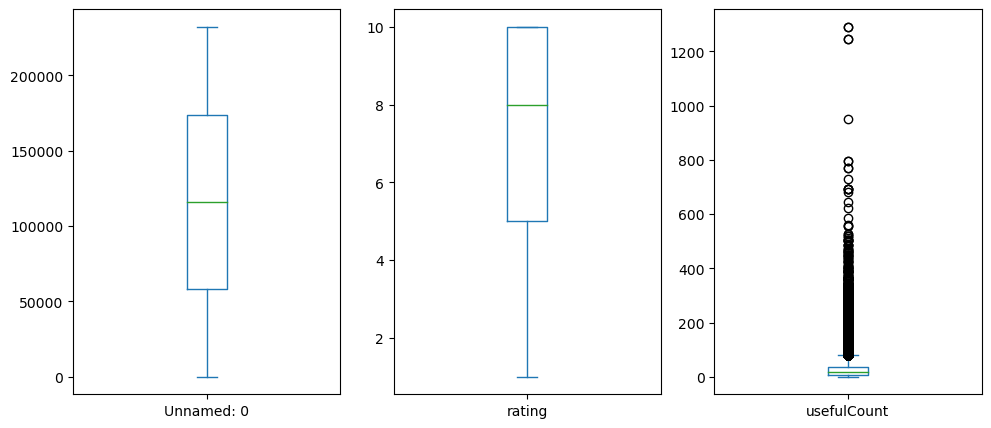

In [9]:
data.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))


In [10]:
data= data[data['condition'].isin(['High Blood Pressure', 'Depression','Diabetes, Type 2'])]
data

Unnamed: 0        drugName            condition  \
11           75612  L-methylfolate           Depression   
31           96233      Sertraline           Depression   
44          121333     Venlafaxine           Depression   
50          156544     Dulaglutide     Diabetes, Type 2   
67          131909      Effexor XR           Depression   
...            ...             ...                  ...   
161251      198130      Metoprolol  High Blood Pressure   
161258       34443        Bystolic  High Blood Pressure   
161278       86533        Invokana     Diabetes, Type 2   
161286       93069    Vortioxetine           Depression   
161290      103458        Tekturna  High Blood Pressure   

                                                   review  rating  \
11      "I have taken anti-depressants for years, with...    10.0   
31      "1 week on Zoloft for anxiety and mood swings....     8.0   
44      "my gp started me on Venlafaxine yesterday to ...     4.0   
50      "Hey Guys,  It&#039;s been 4 months since my l...    10.0   
67      "This medicine saved my life. I was at my wits...    10.0   
...                                                   ...     ...   
161251  "It is fourth blood pressure pill for me. It f...     4.0   
161258  "While on Bystolic my feet and arms were numb....     1.0   
161278  "I just got diagnosed with type 2. My doctor p...     9.0   
161286  "This is the third med I&#039;ve tried for anx...     2.0   
161290  "I have only been on Tekturna for 9 days. The ...     7.0   

                    date  usefulCount  
11         March 9, 2017           54  
31           May 7, 2011            3  
44        April 27, 2016            3  
50      October 24, 2017           24  
67         June 20, 2013          166  
...                  ...          ...  
161251     July 15, 2009           39  
161258     July 18, 2009           25  
161278  October 23, 2015           47  
161286     July 17, 2016           33  
161290  February 7, 2010           18  

[13944 rows x 7 columns]

In [11]:
data = data.drop(['Unnamed: 0'], axis =1)
data

drugName            condition  \
11      L-methylfolate           Depression   
31          Sertraline           Depression   
44         Venlafaxine           Depression   
50         Dulaglutide     Diabetes, Type 2   
67          Effexor XR           Depression   
...                ...                  ...   
161251      Metoprolol  High Blood Pressure   
161258        Bystolic  High Blood Pressure   
161278        Invokana     Diabetes, Type 2   
161286    Vortioxetine           Depression   
161290        Tekturna  High Blood Pressure   

                                                   review  rating  \
11      "I have taken anti-depressants for years, with...    10.0   
31      "1 week on Zoloft for anxiety and mood swings....     8.0   
44      "my gp started me on Venlafaxine yesterday to ...     4.0   
50      "Hey Guys,  It&#039;s been 4 months since my l...    10.0   
67      "This medicine saved my life. I was at my wits...    10.0   
...                                                   ...     ...   
161251  "It is fourth blood pressure pill for me. It f...     4.0   
161258  "While on Bystolic my feet and arms were numb....     1.0   
161278  "I just got diagnosed with type 2. My doctor p...     9.0   
161286  "This is the third med I&#039;ve tried for anx...     2.0   
161290  "I have only been on Tekturna for 9 days. The ...     7.0   

                    date  usefulCount  
11         March 9, 2017           54  
31           May 7, 2011            3  
44        April 27, 2016            3  
50      October 24, 2017           24  
67         June 20, 2013          166  
...                  ...          ...  
161251     July 15, 2009           39  
161258     July 18, 2009           25  
161278  October 23, 2015           47  
161286     July 17, 2016           33  
161290  February 7, 2010           18  

[13944 rows x 6 columns]

In [12]:
data.isna().sum()

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [13]:
data[data.duplicated()].shape

(0, 6)

In [14]:
data.describe()

rating   usefulCount
count  13944.000000  13944.000000
mean       6.862952     45.737880
std        3.207061     51.782627
min        1.000000      0.000000
25%        4.000000     16.000000
50%        8.000000     31.000000
75%       10.000000     59.000000
max       10.000000   1291.000000

In [15]:
# Dropping the data points with null values 
data = data.dropna(how = 'any', axis = 0)
# lowercasing the column names so it will be easier for access ^^
data.columns = data.columns.str.lower()
# Sorting the dataframe
data.sort_values(['rating'], ascending = True, inplace = True)
data.reset_index(drop = True, inplace = True)
# Converting the date in to date time format 
data['date'] = pd.to_datetime(data['date'])
data.head(10)

drugname            condition  \
0                        Citalopram           Depression   
1                        Duloxetine           Depression   
2                          Bystolic  High Blood Pressure   
3                         Trulicity     Diabetes, Type 2   
4                           Oleptro           Depression   
5                        Effexor XR           Depression   
6                         Nebivolol  High Blood Pressure   
7                        Amlodipine  High Blood Pressure   
8  Insulin inhalation, rapid acting     Diabetes, Type 2   
9                           Avandia     Diabetes, Type 2   

                                              review  rating       date  \
0                      "Gave me terrible headaches."     1.0 2009-11-30   
1  "Horrible drug. Didn&#039;t help me with depre...     1.0 2016-02-28   
2  "Was put on bystolic for high blood pressure i...     1.0 2017-10-26   
3  "Was on .75 for a month as suppose to boost th...     1.0 2017-09-20   
4  "Gave me restless, crawly legs on 50mg. It was...     1.0 2013-02-14   
5  "1/10 would not take again.  Felt dizzy nauseo...     1.0 2016-03-10   
6  "Bystolic did not help lower my blood pressure...     1.0 2016-11-04   
7  "56 y/o HEALTHY F w/slightly high BP. Put me o...     1.0 2017-12-10   
8  "All the positive reviews on here are written ...     1.0 2016-10-26   
9  "My father was on avandia for 5 years and suff...     1.0 2015-11-07   

   usefulcount  
0            2  
1           16  
2            7  
3            5  
4           62  
5           14  
6           32  
7            0  
8            9  
9            5

In [16]:
data =data[ (data['condition']=='Depression') 
                 |(data['condition']=='High Blood Pressure')
                 |(data['condition']=='Diabetes, Type 2')]

In [17]:
data

drugname            condition  \
0          Citalopram           Depression   
1          Duloxetine           Depression   
2            Bystolic  High Blood Pressure   
3           Trulicity     Diabetes, Type 2   
4             Oleptro           Depression   
...               ...                  ...   
13939      Sertraline           Depression   
13940      Quetiapine           Depression   
13941          Zoloft           Depression   
13942        Atenolol  High Blood Pressure   
13943  L-methylfolate           Depression   

                                                  review  rating       date  \
0                          "Gave me terrible headaches."     1.0 2009-11-30   
1      "Horrible drug. Didn&#039;t help me with depre...     1.0 2016-02-28   
2      "Was put on bystolic for high blood pressure i...     1.0 2017-10-26   
3      "Was on .75 for a month as suppose to boost th...     1.0 2017-09-20   
4      "Gave me restless, crawly legs on 50mg. It was...     1.0 2013-02-14   
...                                                  ...     ...        ...   
13939  "This medication works great for depression, e...    10.0 2014-12-04   
13940  "Quetiapine 25mg used to get over Post traumat...    10.0 2012-12-16   
13941  "Zoloft has been a life saver for me. I honest...    10.0 2014-12-25   
13942  "Works well for me along with spironolactone. ...    10.0 2013-04-28   
13943  "I have taken anti-depressants for years, with...    10.0 2017-03-09   

       usefulcount  
0                2  
1               16  
2                7  
3                5  
4               62  
...            ...  
13939           45  
13940           31  
13941          247  
13942           32  
13943           54  

[13944 rows x 6 columns]

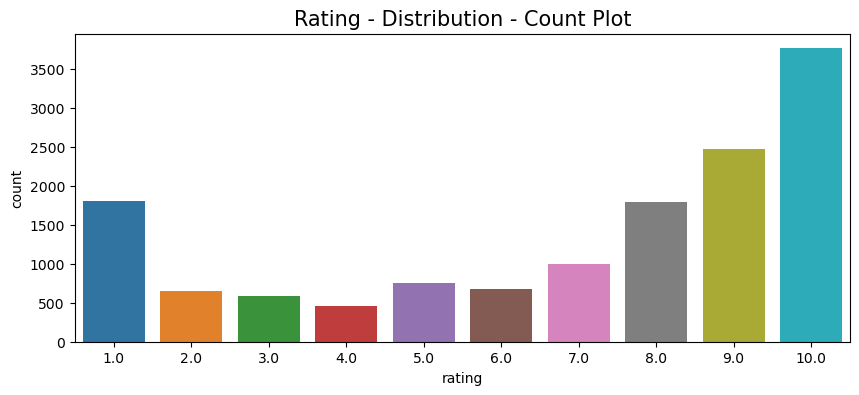

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(x=data.rating)
plt.title('Rating - Distribution - Count Plot',size=15)
plt.show()

In [19]:

# Total unique conditions in the dataset
print (data['condition'].nunique(), "\n")

print ("some of the conditions are : ", data['condition'].unique()[0:10])

3 

some of the conditions are :  ['Depression' 'High Blood Pressure' 'Diabetes, Type 2']


In [20]:

#top 10 drugs with rating equals 10
data.loc[data['rating'] == 10, :]['drugname'].value_counts().head(10)

Bupropion         158
Sertraline        126
Escitalopram      118
Desvenlafaxine    115
Citalopram        112
Pristiq           111
Victoza           101
Liraglutide        99
Venlafaxine        93
Lexapro            86
Name: drugname, dtype: int64

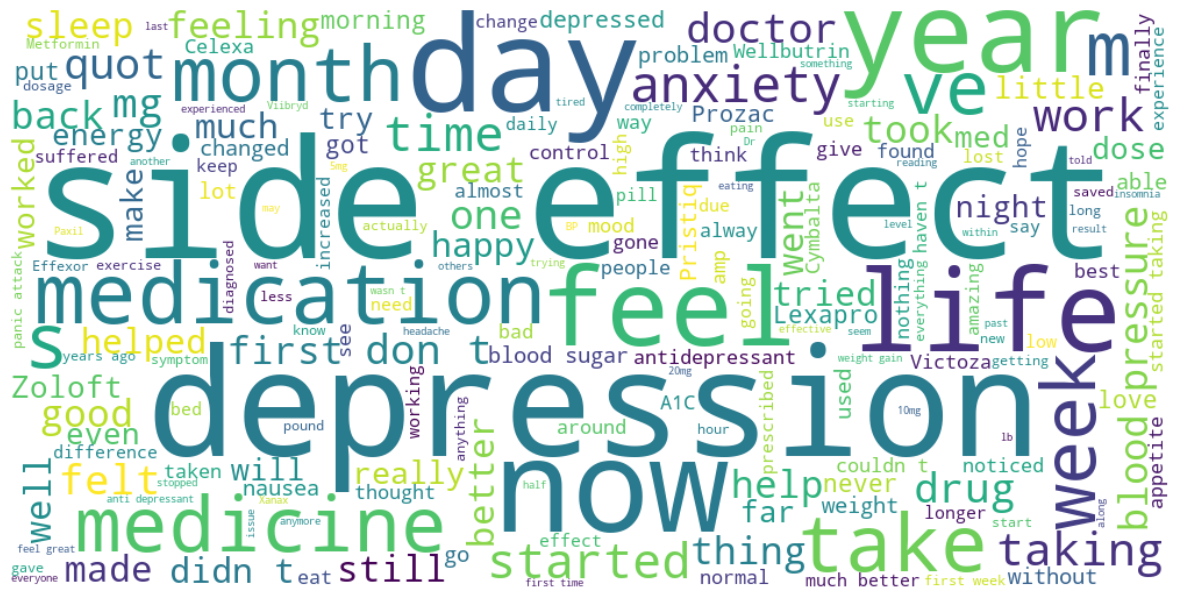

In [21]:

# Word cloud of the reviews with rating equal to 10
#stopwords = set(STOPWORDS)

df_rate_ten = data.loc[data.rating == 10, 'review']
text = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

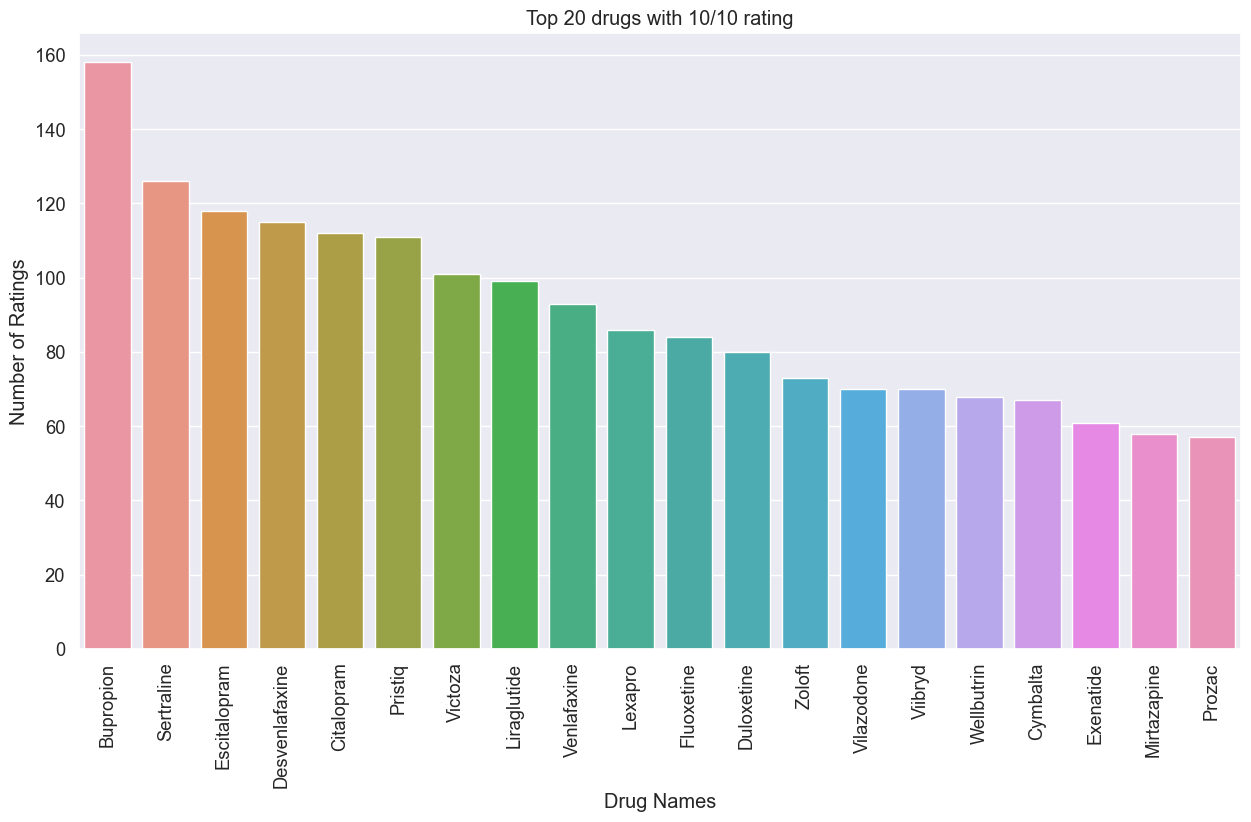

In [22]:

# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

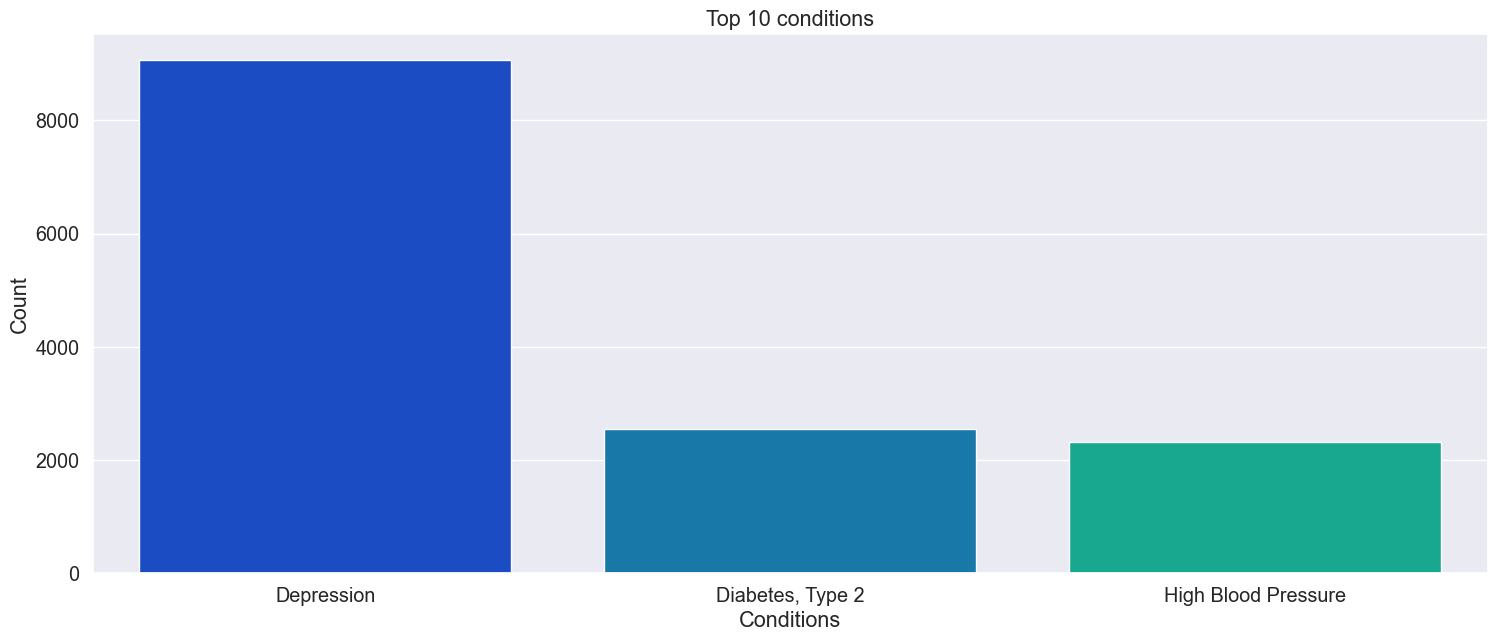

In [23]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");
     

Text(0.5, 0, 'Rating')

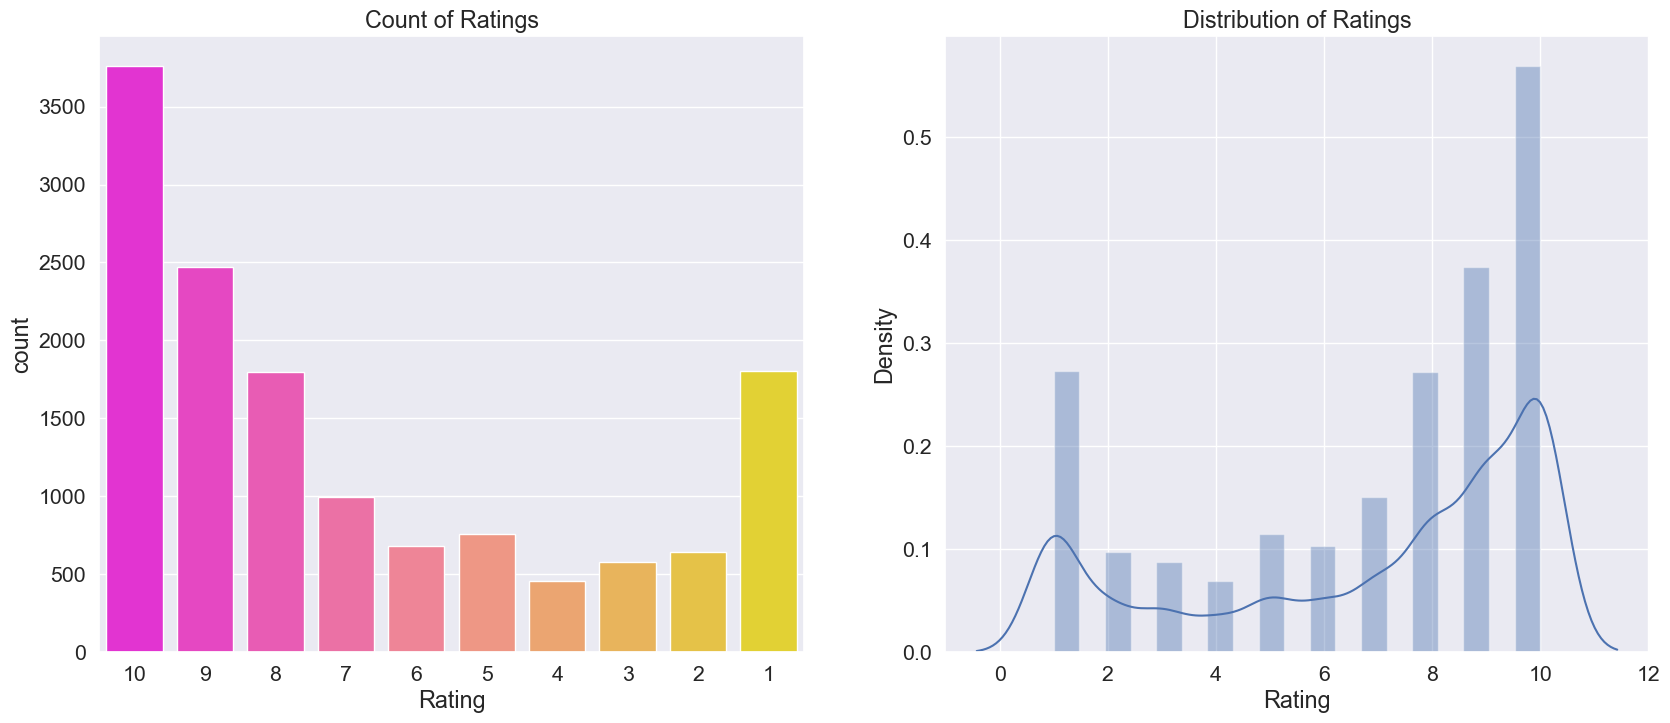

In [24]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data=data, x="rating", palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

# Preprocessing

In [25]:

# Giving the Sentiment according to the ratings
import math
data['sentiment_rate'] = data['rating'].apply(lambda x: math.ceil(x/2))
data['sentiment_rate'].value_counts()

5    6231
4    2790
1    2447
3    1436
2    1040
Name: sentiment_rate, dtype: int64

(0.0, 4139.3)

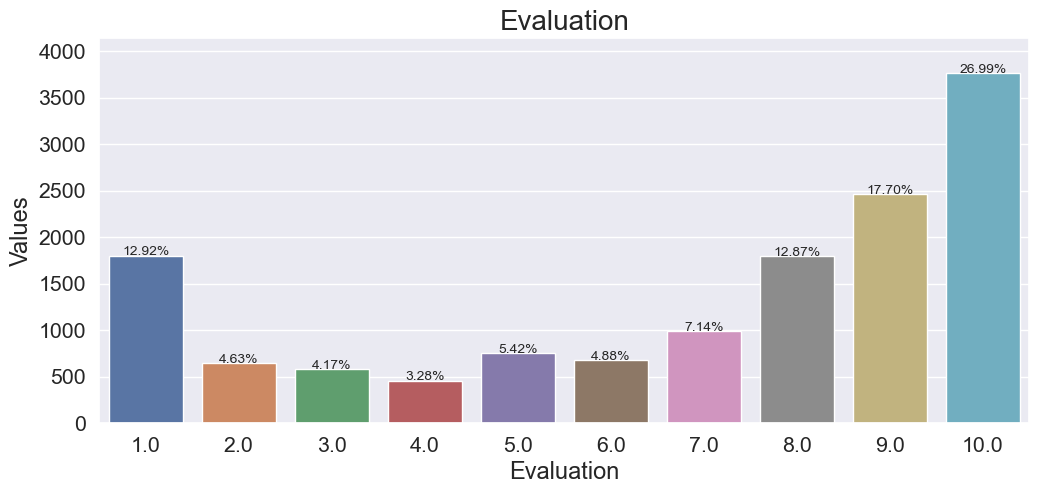

In [26]:
total = len(data)
ax1 = plt.figure(figsize=(12,5))

g = sns.countplot(x='rating', data=data)
g.set_title("Evaluation", fontsize=20)
g.set_xlabel("Evaluation", fontsize=17)
g.set_ylabel("Values", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.1)

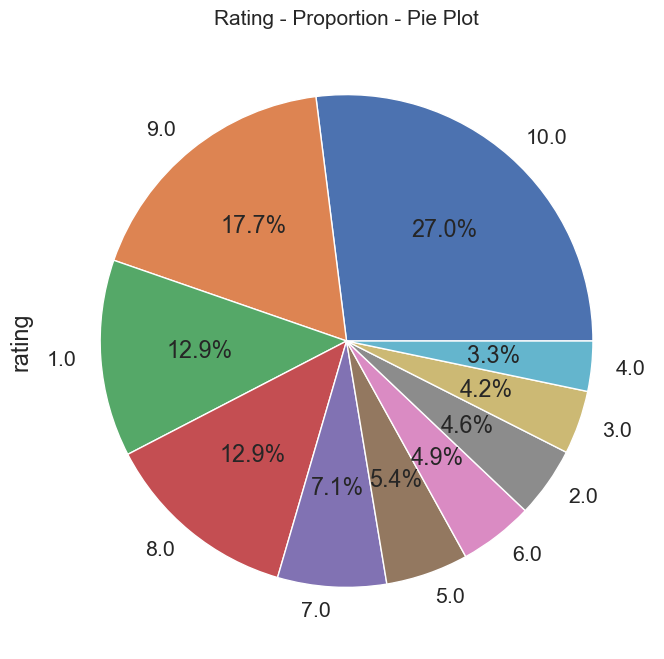

In [27]:
plt.figure(figsize=(8,8))
data.rating.value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title('Rating - Proportion - Pie Plot',size=15)
plt.show()

In [28]:
data.corr()

rating  usefulcount  sentiment_rate
rating          1.000000     0.243938        0.988582
usefulcount     0.243938     1.000000        0.237647
sentiment_rate  0.988582     0.237647        1.000000

Word count plot

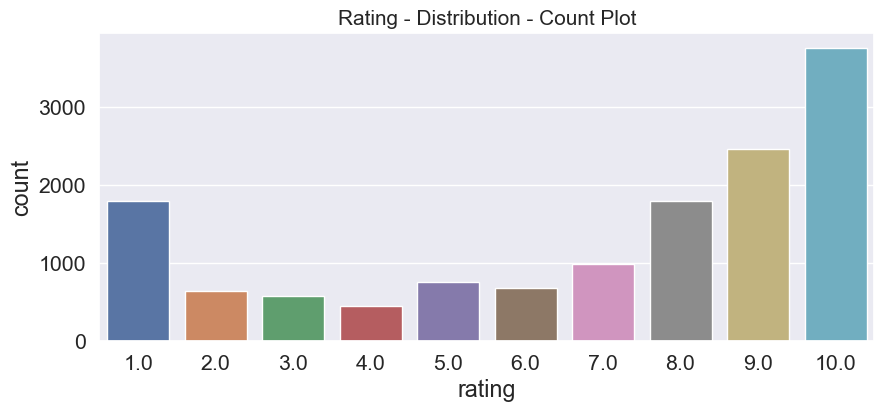

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(x=data['rating'])
plt.title('Rating - Distribution - Count Plot',size=15)
plt.show()

In [30]:
data.isnull().sum()

drugname          0
condition         0
review            0
rating            0
date              0
usefulcount       0
sentiment_rate    0
dtype: int64

In [31]:
count=data.isnull().sum().sort_values(ascending=True)
count

drugname          0
condition         0
review            0
rating            0
date              0
usefulcount       0
sentiment_rate    0
dtype: int64

In [32]:
def review_clean(review): 
    # changing review to lower cases.
    lower = review.str.lower()
    
    # Replacing the repeating pattern of '
    pattern_remove = lower.str.replace("'", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe
     

In [33]:

# Contraction Dictionary for the expansion

contractions_dict = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
    "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
    "doesn’t": "does not", "don't": "do not", "don’t": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not",
    "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
    "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
    "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not","might've": "might have",
    "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
    "needneedn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
    "shan't": "shall not","sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", 
    "shouldn't've": "should not have", "so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have",
    "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "they'd": "they would",
    "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
    "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
    "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
    "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
    "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y’all": "you all", "y'all'd": "you all would",
    "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have",
    "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", "ain’t": "am not", "aren’t": "are not",
    "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not", "couldn’t’ve": "could not have",
    "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
    "hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have",
    "he’s": "he is", "how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
    "i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would", "it’d’ve": "it would have",
    "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us", "ma’am": "madam", "mayn’t": "may not",
    "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
    "mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock",
      "oughtn’t": "ought not", "oughtn’t’ve": "ought not have", "shan’t": "shall not", "sha’n’t": "shall not", "shan’t’ve": "shall not have",
    "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will", "she’ll’ve": "she will have", "she’s": "she is",
    "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have", "so’ve": "so have", "so’s": "so is",
    "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would", "there’d’ve": "there would have",
    "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will", "they’ll’ve": "they will have",
    "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would", "we’d’ve": "we would have",
    "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
    "what’ll’ve": "what will have", "what’re": "what are", "what’s": "what is", "what’ve": "what have", "when’s": "when is",
    "when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will",
    "who’ll’ve": "who will have", "who’s": "who is", "who’ve": "who have","why’s": "why is", "why’ve": "why have", "will’ve": "will have",
    "won’t": "will not", "won’t’ve": "will not have", "would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have",
    "y’all": "you all", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have", "y’all’re": "you all are",
    "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
    "you’re": "you are", "you’re": "you are", "you’ve": "you have"
}
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function expand the contractions if there's any
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)


In [34]:

#applying the above assumptions into a column
data['review_clean'] = review_clean(data['review'])

# Expanding the contractions
data['review_clean'] = data['review_clean'].apply(lambda x: expand_contractions(x))

# Removing punctuations
data['review_clean'] = data['review_clean'].apply(lambda x: ''.join(word for word in x if word not in punctuation))

In [35]:
#Rename columns
data.rename(columns = {'unnamed: 0':'uniqueID'}, inplace = True)

In [36]:
print(data.columns)

Index(['drugname', 'condition', 'review', 'rating', 'date', 'usefulcount',
       'sentiment_rate', 'review_clean'],
      dtype='object')


In [37]:
data.head()

drugname            condition  \
0  Citalopram           Depression   
1  Duloxetine           Depression   
2    Bystolic  High Blood Pressure   
3   Trulicity     Diabetes, Type 2   
4     Oleptro           Depression   

                                              review  rating       date  \
0                      "Gave me terrible headaches."     1.0 2009-11-30   
1  "Horrible drug. Didn&#039;t help me with depre...     1.0 2016-02-28   
2  "Was put on bystolic for high blood pressure i...     1.0 2017-10-26   
3  "Was on .75 for a month as suppose to boost th...     1.0 2017-09-20   
4  "Gave me restless, crawly legs on 50mg. It was...     1.0 2013-02-14   

   usefulcount  sentiment_rate  \
0            2               1   
1           16               1   
2            7               1   
3            5               1   
4           62               1   

                                        review_clean  
0                         gave me terrible headaches  
1  horrible drug didn 039 t help me with depressi...  
2  was put on bystolic for high blood pressure in...  
3  was on 75 for a month as suppose to boost this...  
4  gave me restless crawly legs on 50mg it was ve...

In [38]:

from textblob import TextBlob
"""I have used textblob module to give the sentiment polarity of the review. This polarity is given to both the cleaned and uncleaned review"""
#from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
nltk.download('stopwords')

# Removing the stopwords from the review_clean column
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

# Separating the day, month and year from the Date

data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [40]:
data['sentiment'] = sentiment(data['review'])

data['sentiment_clean'] = sentiment(data['review_clean'])

np.corrcoef(data['sentiment'], data['rating'])

np.corrcoef(data['sentiment_clean'], data['rating'])
     

array([[1.        , 0.26968613],
       [0.26968613, 1.        ]])

In [41]:
# Cleaning the reviews without removing the stop words and using snowball stemmer

data['review_clean_ss'] = review_clean(data['review'])

data['review_clean_ss'] = data['review_clean_ss'].apply(lambda x: expand_contractions(x))

data['review_clean_ss'] = data['review_clean_ss'].apply(lambda x: ''.join(word for word in x if word not in punctuation))

data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

np.corrcoef(data['sentiment_clean_ss'], data['rating'])

array([[1.        , 0.38471236],
       [0.38471236, 1.        ]])

In [42]:
data.head()

drugname            condition  \
0  Citalopram           Depression   
1  Duloxetine           Depression   
2    Bystolic  High Blood Pressure   
3   Trulicity     Diabetes, Type 2   
4     Oleptro           Depression   

                                              review  rating       date  \
0                      "Gave me terrible headaches."     1.0 2009-11-30   
1  "Horrible drug. Didn&#039;t help me with depre...     1.0 2016-02-28   
2  "Was put on bystolic for high blood pressure i...     1.0 2017-10-26   
3  "Was on .75 for a month as suppose to boost th...     1.0 2017-09-20   
4  "Gave me restless, crawly legs on 50mg. It was...     1.0 2013-02-14   

   usefulcount  sentiment_rate  \
0            2               1   
1           16               1   
2            7               1   
3            5               1   
4           62               1   

                                        review_clean  day  month  year  \
0                               gave terribl headach   30     11  2009   
1  horribl drug 039 help depress made even wors 0...   28      2  2016   
2  put bystol high blood pressur induc stress hor...   26     10  2017   
3  75 month suppos boost 1 5 75 bad weight loss b...   20      9  2017   
4  gave restless crawli leg 50mg sedat 12 wks ago...   14      2  2013   

   sentiment  sentiment_clean  \
0  -1.000000         0.000000   
1  -0.700000        -0.066667   
2  -0.102864         0.013766   
3  -0.042244        -0.113604   
4  -0.105556        -0.344444   

                                     review_clean_ss  sentiment_clean_ss  
0                         gave me terrible headaches           -1.000000  
1  horrible drug didn 039 t help me with depressi...           -0.700000  
2  was put on bystolic for high blood pressure in...           -0.102864  
3  was on 75 for a month as suppose to boost this...           -0.102493  
4  gave me restless crawly legs on 50mg it was ve...           -0.105556

In [43]:
# Calculating weighted ratings
# Formula : (R*v + C*m)/(v+m)
# R - data['rating']
# v - data['usefulcount']
# C (mean rating for entire dataset) - data['rating'].mean()
# m (least # of votes/usefulcount required to be accepted in 70 percentile) - data['usefulcount'].quantile(0.70)

# Calculating C
C=int(data['rating'].mean())

#Calculating m
m = data['usefulcount'].quantile(0.70)
m

51.0

In [44]:

data['weighted_rating'] = ((data['rating']*data['usefulcount']) + (C*m))/(data['usefulcount']+m)

In [45]:

data.head()

drugname            condition  \
0  Citalopram           Depression   
1  Duloxetine           Depression   
2    Bystolic  High Blood Pressure   
3   Trulicity     Diabetes, Type 2   
4     Oleptro           Depression   

                                              review  rating       date  \
0                      "Gave me terrible headaches."     1.0 2009-11-30   
1  "Horrible drug. Didn&#039;t help me with depre...     1.0 2016-02-28   
2  "Was put on bystolic for high blood pressure i...     1.0 2017-10-26   
3  "Was on .75 for a month as suppose to boost th...     1.0 2017-09-20   
4  "Gave me restless, crawly legs on 50mg. It was...     1.0 2013-02-14   

   usefulcount  sentiment_rate  \
0            2               1   
1           16               1   
2            7               1   
3            5               1   
4           62               1   

                                        review_clean  day  month  year  \
0                               gave terribl headach   30     11  2009   
1  horribl drug 039 help depress made even wors 0...   28      2  2016   
2  put bystol high blood pressur induc stress hor...   26     10  2017   
3  75 month suppos boost 1 5 75 bad weight loss b...   20      9  2017   
4  gave restless crawli leg 50mg sedat 12 wks ago...   14      2  2013   

   sentiment  sentiment_clean  \
0  -1.000000         0.000000   
1  -0.700000        -0.066667   
2  -0.102864         0.013766   
3  -0.042244        -0.113604   
4  -0.105556        -0.344444   

                                     review_clean_ss  sentiment_clean_ss  \
0                         gave me terrible headaches           -1.000000   
1  horrible drug didn 039 t help me with depressi...           -0.700000   
2  was put on bystolic for high blood pressure in...           -0.102864   
3  was on 75 for a month as suppose to boost this...           -0.102493   
4  gave me restless crawly legs on 50mg it was ve...           -0.105556   

   weighted_rating  
0         5.811321  
1         4.805970  
2         5.396552  
3         5.553571  
4         3.256637

In [46]:

#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

data['mean_word_len'] = data['mean_word_len'].fillna((data['mean_word_len'].mean()))

In [47]:

data.columns

Index(['drugname', 'condition', 'review', 'rating', 'date', 'usefulcount',
       'sentiment_rate', 'review_clean', 'day', 'month', 'year', 'sentiment',
       'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'weighted_rating', 'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

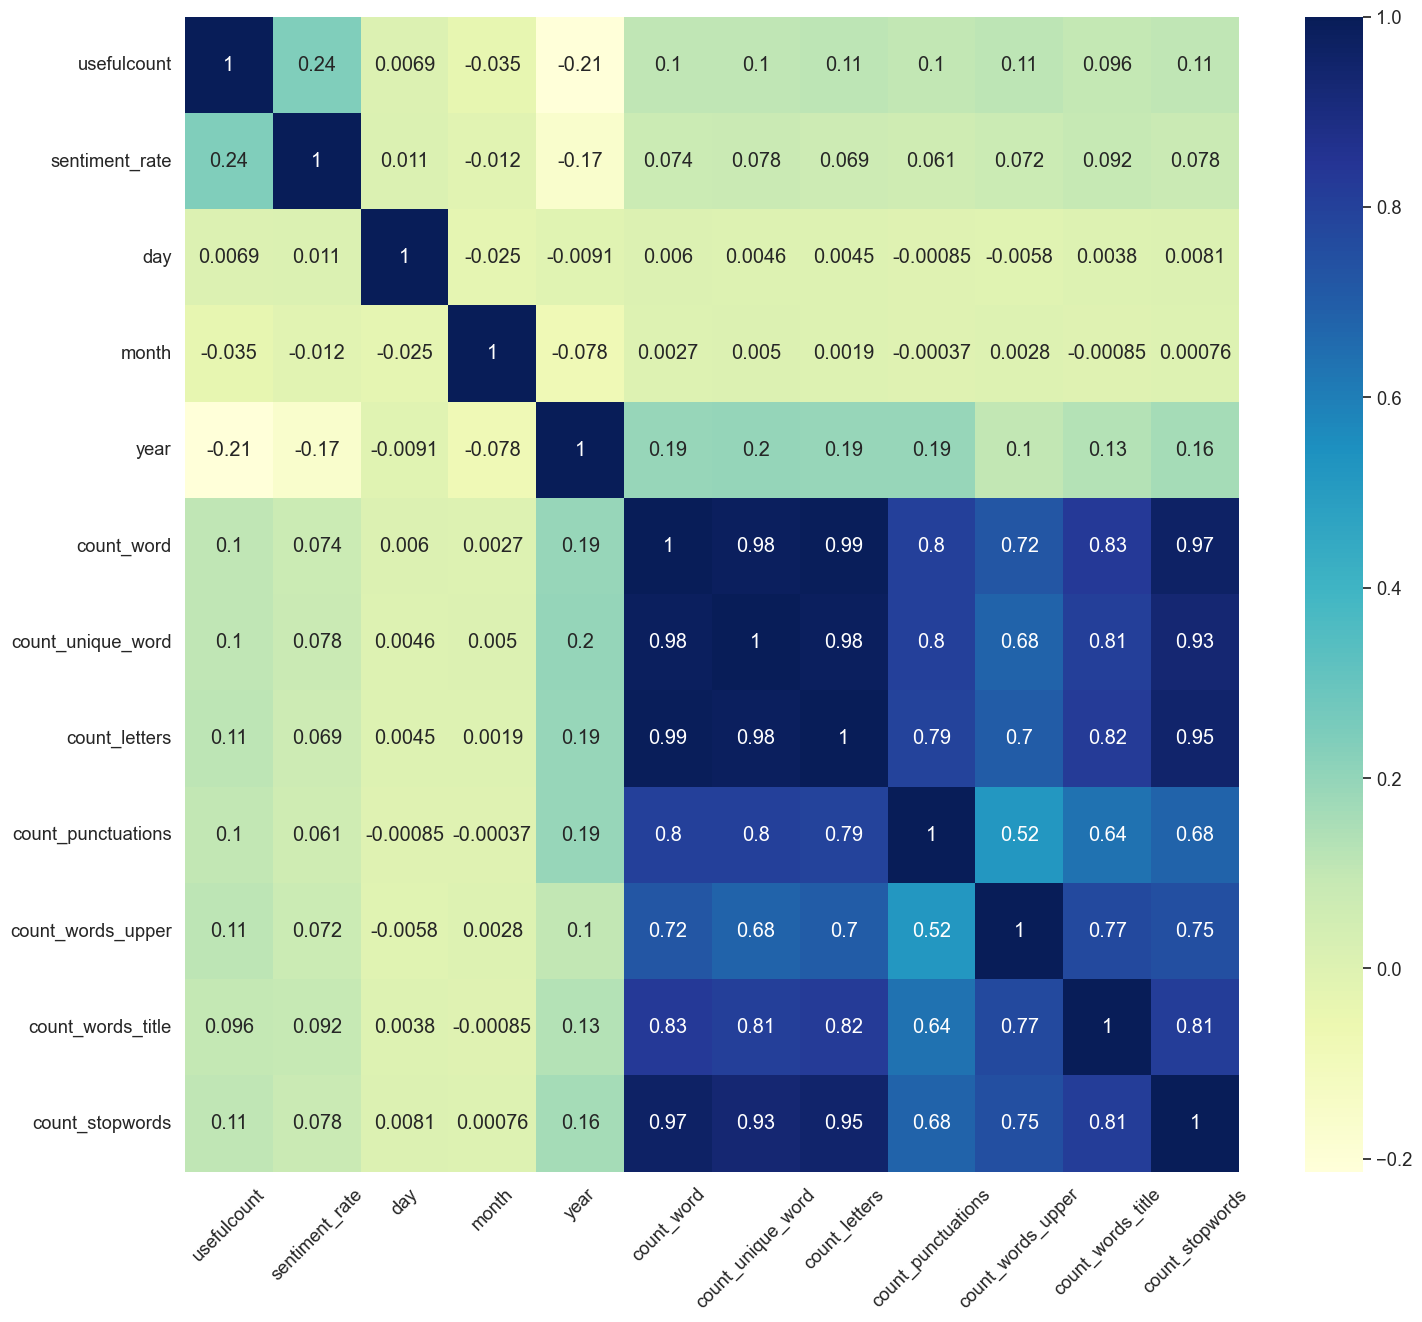

In [48]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.setp(sns_.get_xticklabels(), rotation = 45);

+Correlation Heatmap is plotted using seaborn which contains all the new features engineered and the old features.

In [49]:
data['drugname'].nunique()

334

# Drug Name Visualization

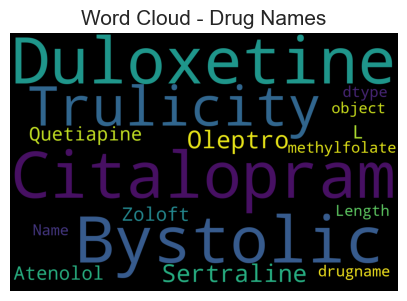

In [50]:
# Word cloud for most popular drugs
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugname']))

plt.rcParams['figure.figsize'] = (5,14)
plt.title('Word Cloud - Drug Names', fontsize = 15)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

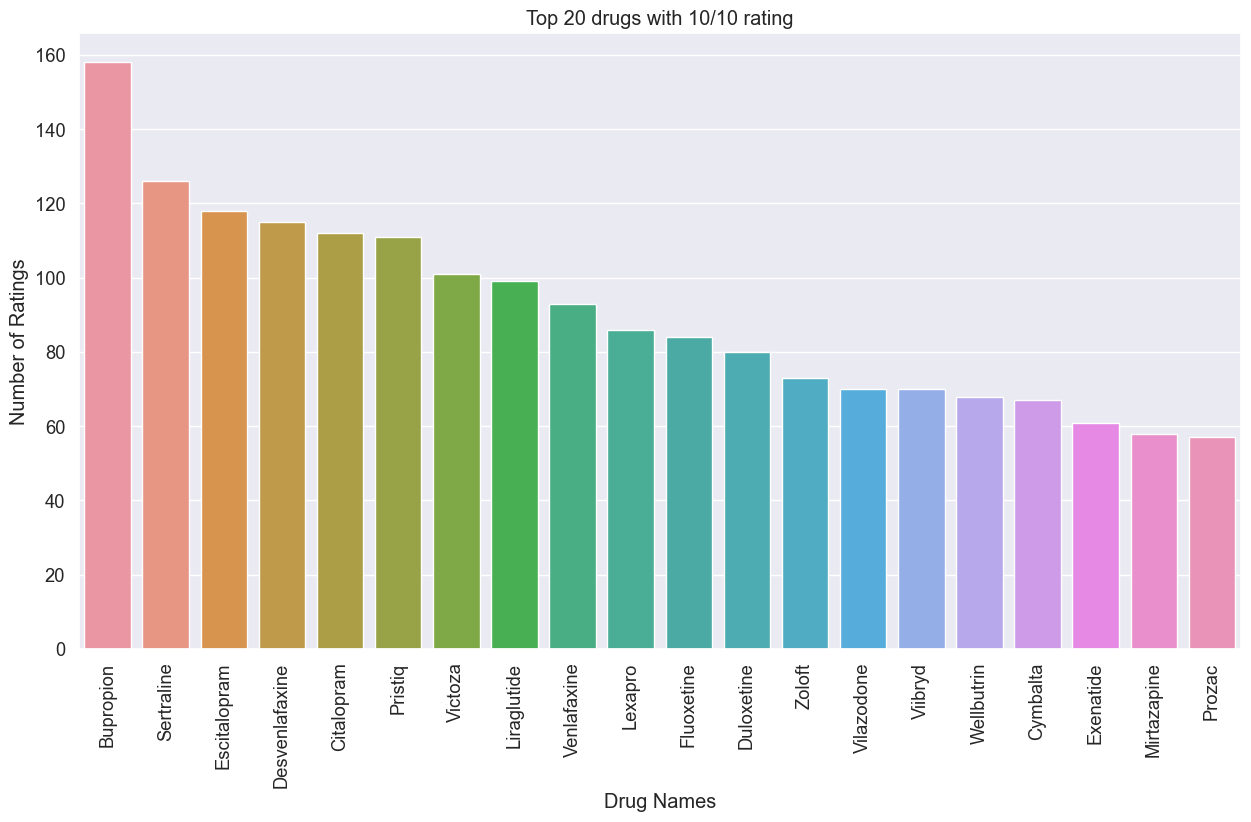

In [51]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

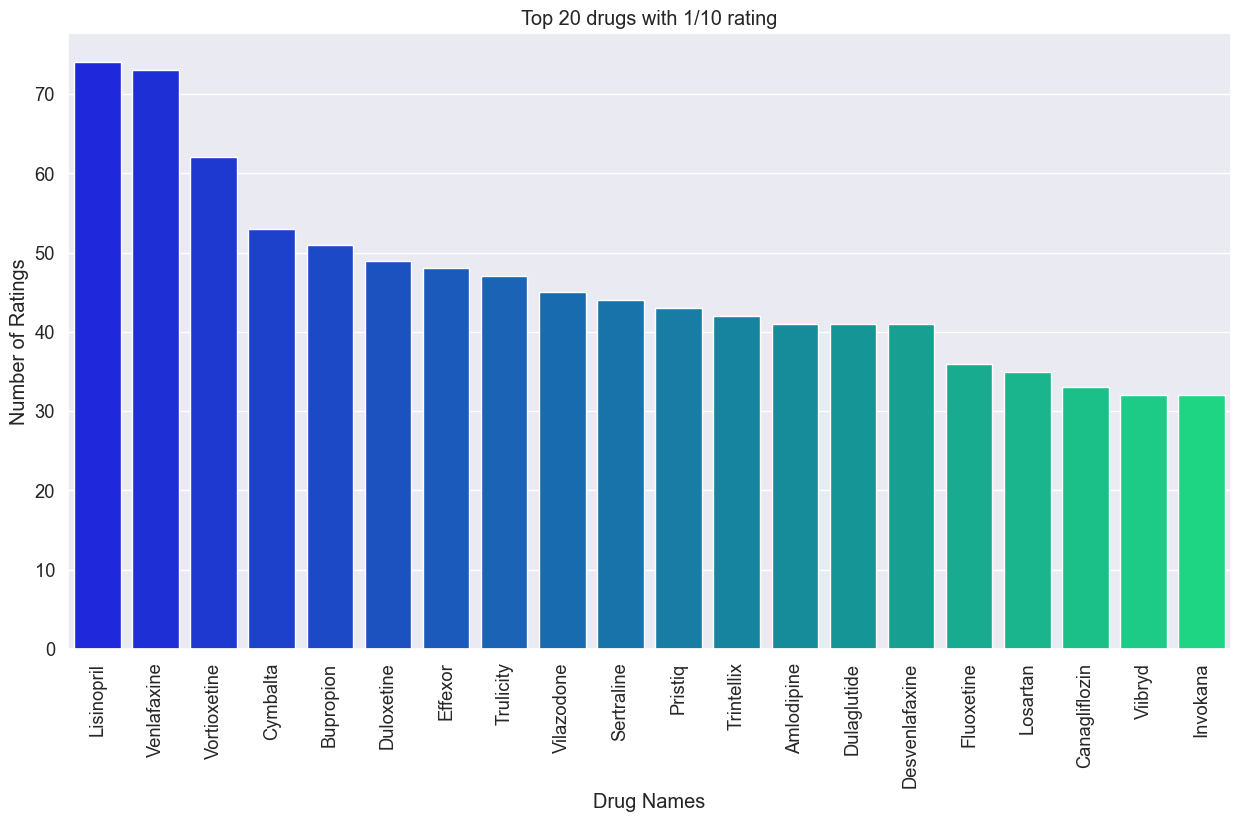

In [52]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

# Rating Visualization

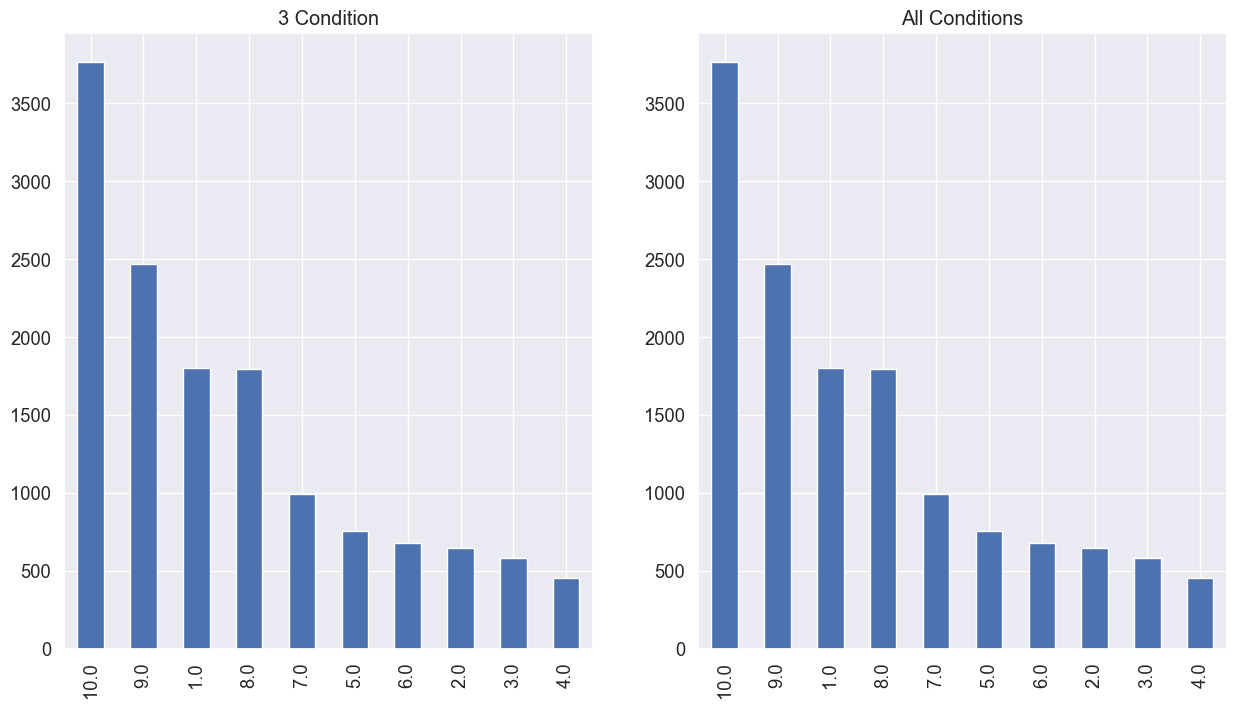

In [53]:
plt.subplot(1, 2, 1)
plt.title("3 Condition")
data['rating'].value_counts().plot.bar()

plt.subplot(1, 2, 2)
plt.title("All Conditions")
data['rating'].value_counts().plot.bar()
plt.show()

In [54]:
data['rating'].value_counts()

10.0    3763
9.0     2468
1.0     1802
8.0     1795
7.0      995
5.0      756
6.0      680
2.0      645
3.0      582
4.0      458
Name: rating, dtype: int64

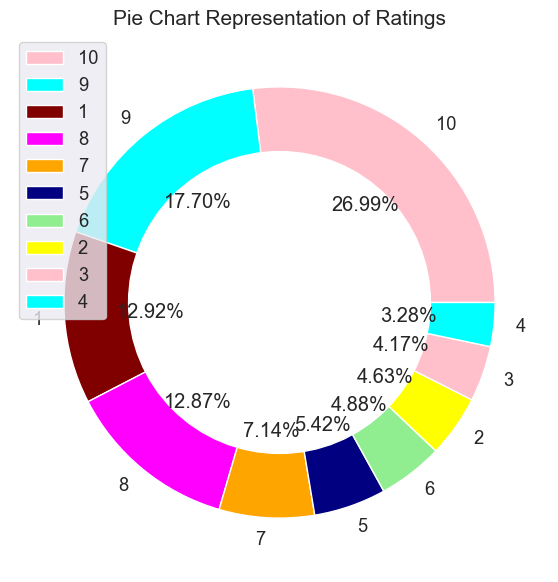

In [55]:
# making a donut chart to represent share of each ratings

size = [3763,2468,1802,1795,995,756,680,645,582,458]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "9", "1", "8", "7", "5", "6", "2", "3","4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 15)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

# Reviews Visualization

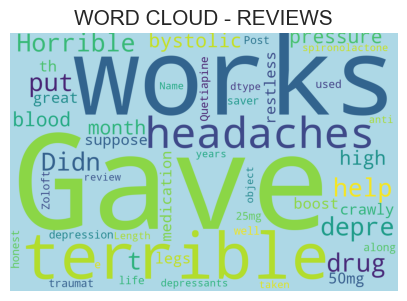

In [56]:
# let's see the words cloud for the reviews 

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (5, 5)
plt.title('WORD CLOUD - REVIEWS', fontsize = 15)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Sentiments

In [57]:
data.loc[(data['rating'] >= 7), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 7), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    9021
0.0    4923
Name: Review_Sentiment, dtype: int64

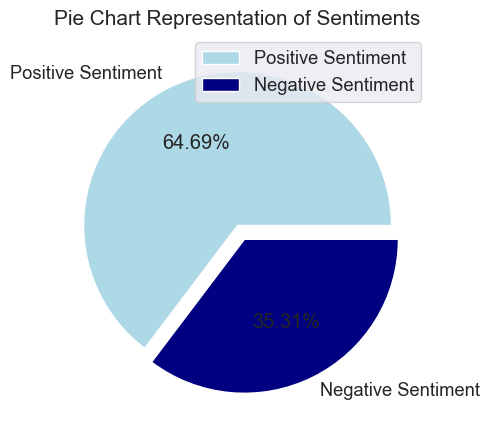

In [58]:
size = [9021, 4923]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 15)
plt.legend()
plt.show()

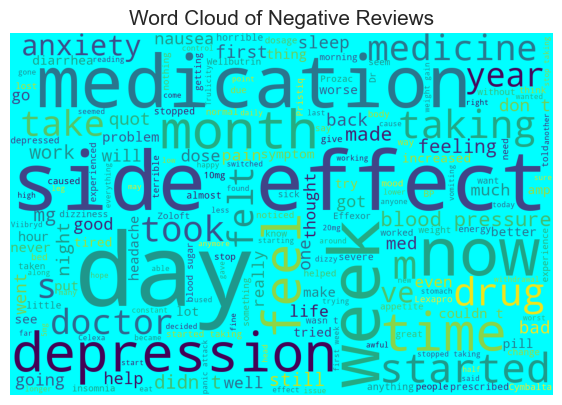

In [59]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (7, 7)
plt.title('Word Cloud of Negative Reviews', fontsize = 15)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [60]:
# Function For Cleaning the text

def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [61]:
import warnings
warnings.filterwarnings("ignore")
data['review_clean'] = review_clean(data['review'])

In [62]:
import re
def remove_number_tag(text):
        return re.sub('[0-9]+', '',text)

In [63]:
data['review_clean'] = data['review_clean'].apply(remove_number_tag)

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase = True, stop_words = "english" )
reviews = tfidf.fit_transform(data['review_clean'])

In [65]:
from textblob import TextBlob
data['polarity'] = data["review_clean"].apply(lambda x: TextBlob(x).sentiment[0])

In [66]:
data.head()

drugname            condition  \
0  Citalopram           Depression   
1  Duloxetine           Depression   
2    Bystolic  High Blood Pressure   
3   Trulicity     Diabetes, Type 2   
4     Oleptro           Depression   

                                              review  rating       date  \
0                      "Gave me terrible headaches."     1.0 2009-11-30   
1  "Horrible drug. Didn&#039;t help me with depre...     1.0 2016-02-28   
2  "Was put on bystolic for high blood pressure i...     1.0 2017-10-26   
3  "Was on .75 for a month as suppose to boost th...     1.0 2017-09-20   
4  "Gave me restless, crawly legs on 50mg. It was...     1.0 2013-02-14   

   usefulcount  sentiment_rate  \
0            2               1   
1           16               1   
2            7               1   
3            5               1   
4           62               1   

                                        review_clean  day  month  ...  \
0                         gave me terrible headaches   30     11  ...   
1  horrible drug didnt help me with depression ma...   28      2  ...   
2  was put on bystolic for high blood pressure in...   26     10  ...   
3  was on  for a month as suppose to boost this u...   20      9  ...   
4  gave me restless crawly legs on mg it was very...   14      2  ...   

   count_word  count_unique_word  count_letters count_punctuations  \
0           4                  4             26                  3   
1          19                 14             96                 13   
2         108                 83            573                 19   
3         125                 96            595                 29   
4          48                 41            249                 10   

   count_words_upper  count_words_title  count_stopwords  mean_word_len  \
0                  0                  1                1       5.750000   
1                  0                  1                4       4.105263   
2                  3                 10               43       4.314815   
3                  4                 11               54       3.768000   
4                  1                  5               20       4.208333   

   Review_Sentiment  polarity  
0               0.0 -1.000000  
1               0.0 -0.700000  
2               0.0 -0.102864  
3               0.0 -0.102493  
4               0.0 -0.105556  

[5 rows x 26 columns]

In [67]:

def sent_type(Review): 
    
        if Review>0.2:
               return 'positive'
        else:
               return 'negative'
    
data['emotion']= data['polarity'].apply(sent_type) 

In [68]:
data['emotion'].value_counts()

negative    10922
positive     3022
Name: emotion, dtype: int64

In [69]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding Drugname and Conditions
label_encoder_feat = {}
for feature in ['drugname', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

The Label Encoder is used to change the categorical values of Drug Names and the conditions in to numerical values for the machine learning modelling. There are 3,667 unique drugs in the dataset that's why One hot encoder is not used as it would generate 3,667 new features and it would be very computationally expensive.

In [70]:
#Print plot overviews of the first 5 movies.
data['review_clean_ss'].head()

0                           gave me terrible headaches
1    horrible drug didn 039 t help me with depressi...
2    was put on bystolic for high blood pressure in...
3    was on 75 for a month as suppose to boost this...
4    gave me restless crawly legs on 50mg it was ve...
Name: review_clean_ss, dtype: object

In [71]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
data['review_clean_ss'] = data['review_clean_ss'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['review_clean_ss'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(13944, 14163)

In [72]:
#Array mapping from feature integer indices to feature name.
tfidf.get_feature_names()[5000:5010]

['established',
 'esteem',
 'estimate',
 'estimated',
 'estranged',
 'estrogen',
 'et',
 'eternally',
 'eternity',
 'ethic']

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances

# Create a CountVectorizer object
count_vect = CountVectorizer()

# Fit and transform the text data
count_matrix = count_vect.fit_transform(data)

# Convert sparse matrix to dense matrix
count_matrix_dense = count_matrix.toarray()

# Compute the Jaccard similarity matrix using pairwise_distances with metric set to 'jaccard'
jaccard_sim = 1 - pairwise_distances(count_matrix_dense, metric='jaccard')


In [74]:
jaccard_sim.shape

(27, 27)

In [75]:
jaccard_sim[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Lemmatization/Tokenization

In [76]:
from textblob import TextBlob
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('tagsets')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-d

True

In [77]:
lemmatizer = WordNetLemmatizer()
w_tokenizer=WhitespaceTokenizer()

In [78]:
def lemmatize(txt):
  """
  This function takes text string as input lemmatize it to its root/base/stem word.
  """
  list_review=[lemmatizer.lemmatize(word=word, pos=tag[0].lower()) if tag[0].lower() in ['a','r','n','v'] else word for word, tag in pos_tag(w_tokenizer.tokenize(txt))]
  return (' '.join([x for x in list_review if x]))

In [79]:
data['Lemmatized_Review']=data['review_clean_ss'].apply(lambda x: lemmatize(x))
data.head()

drugname  condition                                             review  \
0        69          0                      "Gave me terrible headaches."   
1        90          0  "Horrible drug. Didn&#039;t help me with depre...   
2        55          2  "Was put on bystolic for high blood pressure i...   
3       306          1  "Was on .75 for a month as suppose to boost th...   
4       234          0  "Gave me restless, crawly legs on 50mg. It was...   

   rating       date  usefulcount  sentiment_rate  \
0     1.0 2009-11-30            2               1   
1     1.0 2016-02-28           16               1   
2     1.0 2017-10-26            7               1   
3     1.0 2017-09-20            5               1   
4     1.0 2013-02-14           62               1   

                                        review_clean  day  month  ...  \
0                         gave me terrible headaches   30     11  ...   
1  horrible drug didnt help me with depression ma...   28      2  ...   
2  was put on bystolic for high blood pressure in...   26     10  ...   
3  was on  for a month as suppose to boost this u...   20      9  ...   
4  gave me restless crawly legs on mg it was very...   14      2  ...   

   count_letters  count_punctuations  count_words_upper count_words_title  \
0             26                   3                  0                 1   
1             96                  13                  0                 1   
2            573                  19                  3                10   
3            595                  29                  4                11   
4            249                  10                  1                 5   

   count_stopwords  mean_word_len  Review_Sentiment  polarity   emotion  \
0                1       5.750000               0.0 -1.000000  negative   
1                4       4.105263               0.0 -0.700000  negative   
2               43       4.314815               0.0 -0.102864  negative   
3               54       3.768000               0.0 -0.102493  negative   
4               20       4.208333               0.0 -0.105556  negative   

                                   Lemmatized_Review  
0                          give me terrible headache  
1  horrible drug didn 039 t help me with depressi...  
2  be put on bystolic for high blood pressure ind...  
3  be on 75 for a month as suppose to boost this ...  
4  give me restless crawly legs on 50mg it be ver...  

[5 rows x 28 columns]

**Review Before Lemmatization**

In [80]:
data['review_clean_ss'][1000]

'i found that there are too many side effects with this medicine the worst was numbing of my face also i had nausea and vomiting which caused dehydration i only took it for 2 weeks'

In [81]:
len(word_tokenize(data['review_clean_ss'][1000]))

35

In [82]:
len(data['review_clean_ss'][1000])

179

**Review After Lemmatization**

In [83]:
data['Lemmatized_Review'][1000]

'i find that there be too many side effect with this medicine the worst be numb of my face also i have nausea and vomiting which cause dehydration i only take it for 2 week'

In [84]:
len(word_tokenize(data['Lemmatized_Review'][1000]))

35

In [85]:
len(data['Lemmatized_Review'][1000])

171

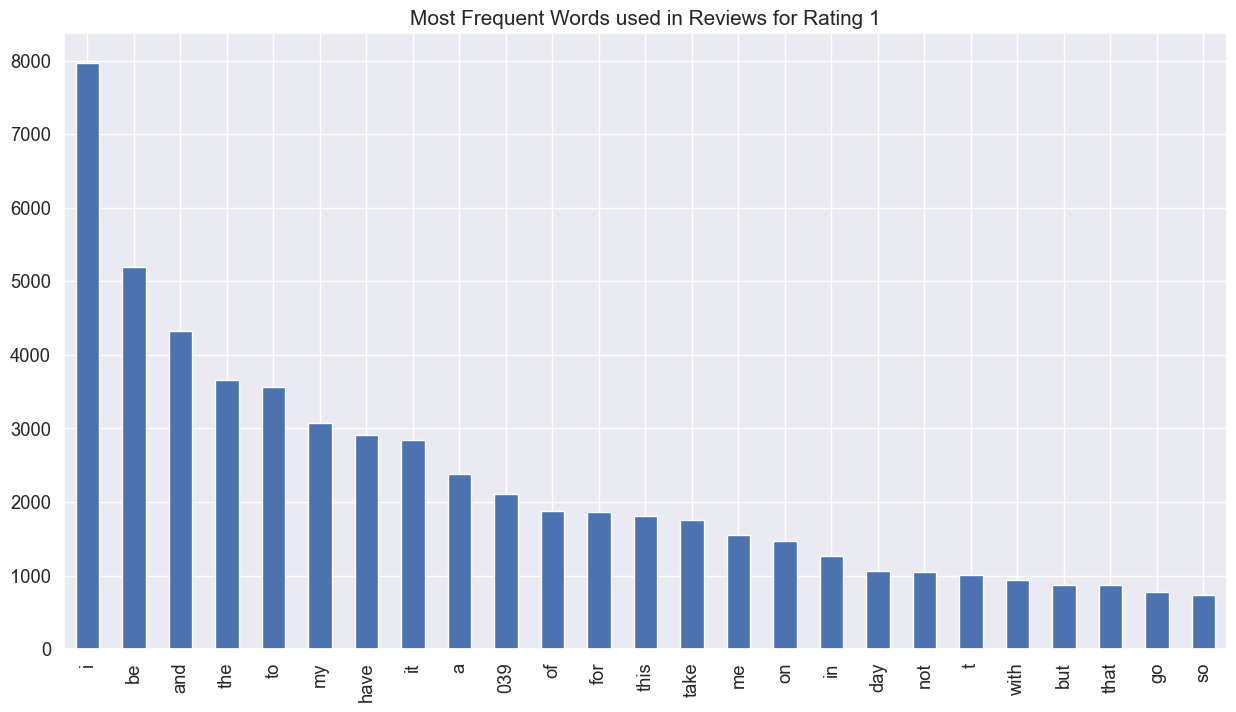

In [86]:
word_freq_rating_1=pd.Series(" ".join(data[data['rating']==1]['Lemmatized_Review']).split()).value_counts()[:25]
word_freq_rating_1.plot(kind='bar',figsize=(15,8))
plt.title('Most Frequent Words used in Reviews for Rating 1',size=15)
plt.show()

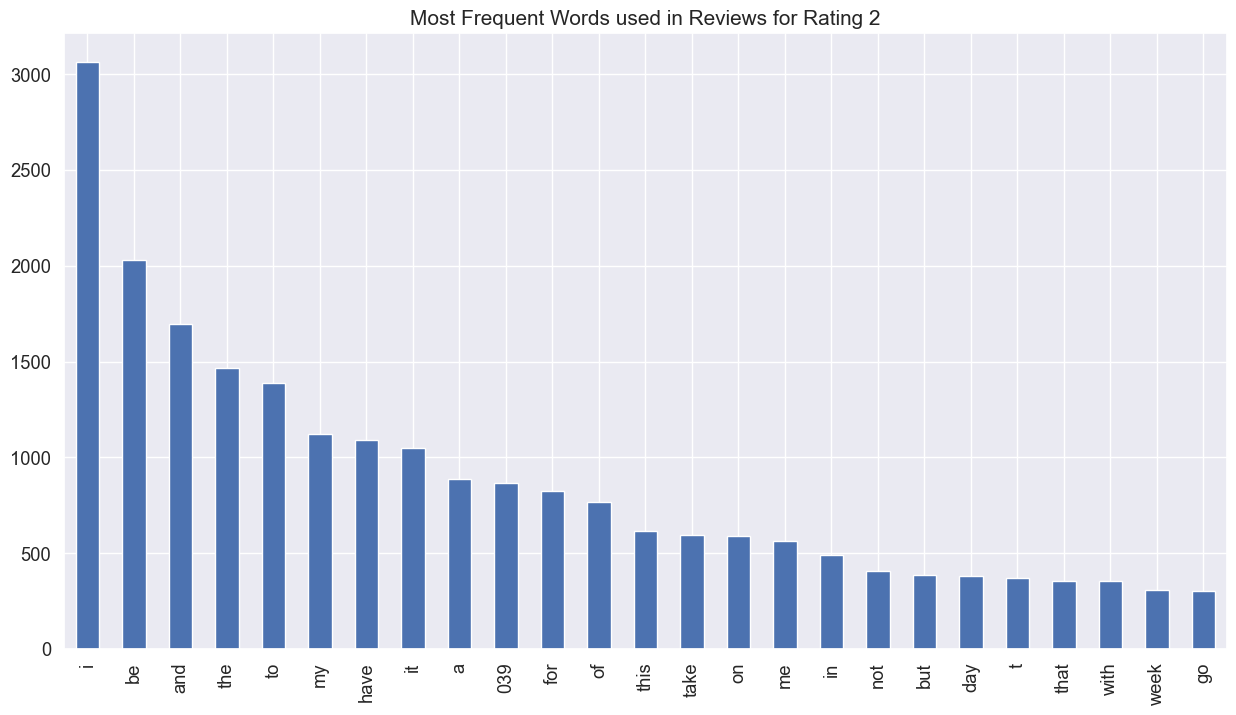

In [87]:
word_freq_rating_2=pd.Series(" ".join(data[data['rating']==2]['Lemmatized_Review']).split()).value_counts()[:25]
word_freq_rating_2.plot(kind='bar',figsize=(15,8))
plt.title('Most Frequent Words used in Reviews for Rating 2',size=15)
plt.show()

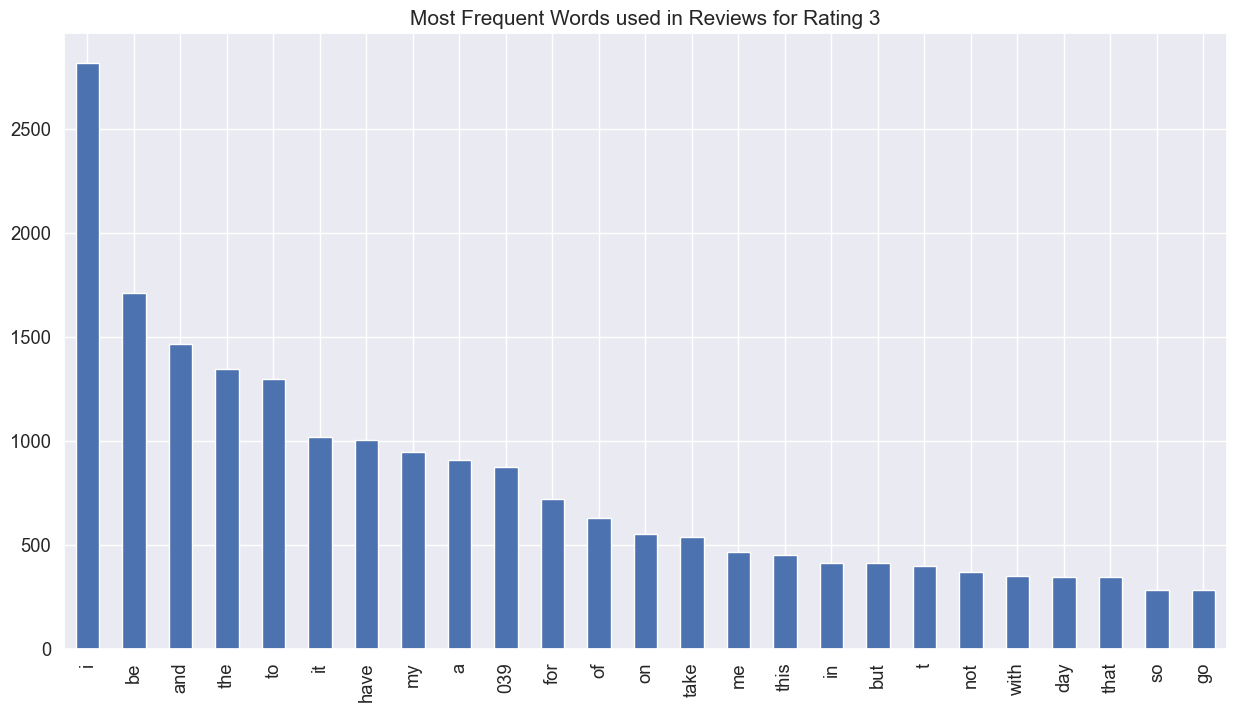

In [88]:
word_freq_rating_3=pd.Series(" ".join(data[data['rating']==3]['Lemmatized_Review']).split()).value_counts()[:25]
word_freq_rating_3.plot(kind='bar',figsize=(15,8))
plt.title('Most Frequent Words used in Reviews for Rating 3',size=15)
plt.show()

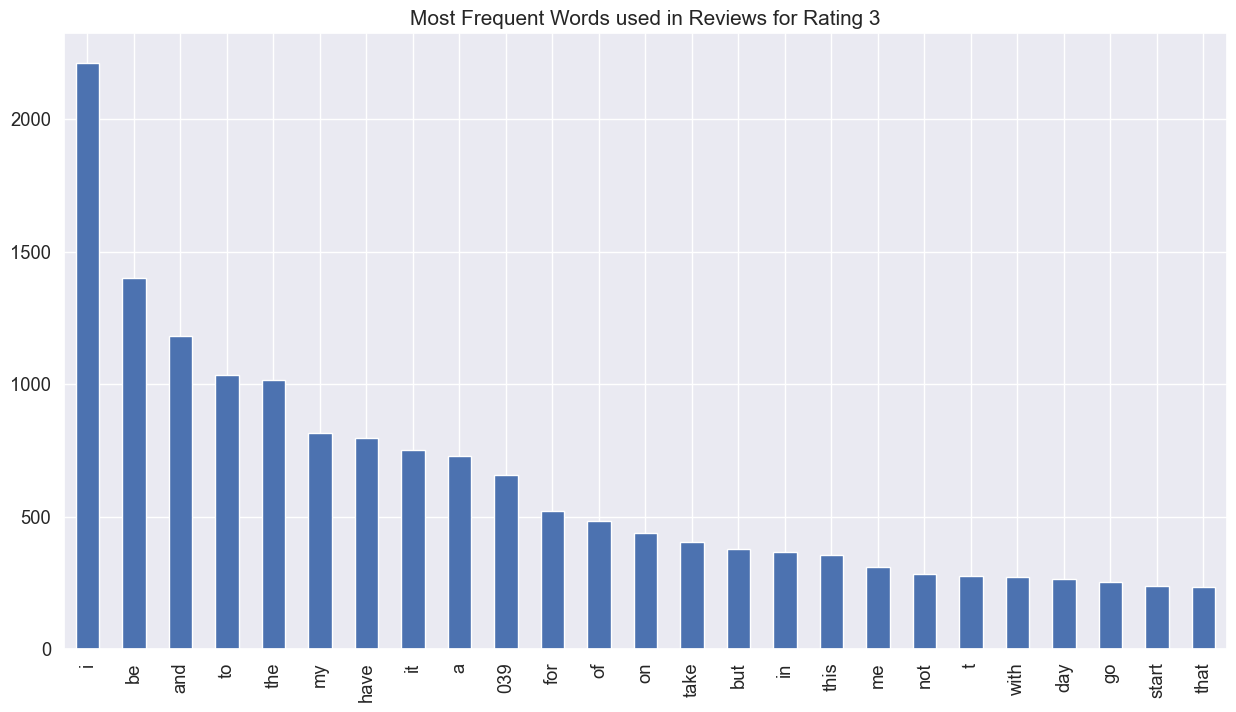

In [89]:
word_freq_rating_3=pd.Series(" ".join(data[data['rating']==4]['Lemmatized_Review']).split()).value_counts()[:25]
word_freq_rating_3.plot(kind='bar',figsize=(15,8))
plt.title('Most Frequent Words used in Reviews for Rating 3',size=15)
plt.show()

# Sentiment Analysis Using TextBlob

In [90]:

def sentiment_analysis_textblob(review):
  """
  This Function takes review (word/sentence/corpus) as input and find Subjectivity and Polarity
  """
  sentiment=TextBlob(review).sentiment
  return pd.Series([sentiment.subjectivity,sentiment.polarity])
data[['subjectivity','polarity']]=data['Lemmatized_Review'].apply(lambda x : sentiment_analysis_textblob(x))
data.head()

drugname  condition                                             review  \
0        69          0                      "Gave me terrible headaches."   
1        90          0  "Horrible drug. Didn&#039;t help me with depre...   
2        55          2  "Was put on bystolic for high blood pressure i...   
3       306          1  "Was on .75 for a month as suppose to boost th...   
4       234          0  "Gave me restless, crawly legs on 50mg. It was...   

   rating       date  usefulcount  sentiment_rate  \
0     1.0 2009-11-30            2               1   
1     1.0 2016-02-28           16               1   
2     1.0 2017-10-26            7               1   
3     1.0 2017-09-20            5               1   
4     1.0 2013-02-14           62               1   

                                        review_clean  day  month  ...  \
0                         gave me terrible headaches   30     11  ...   
1  horrible drug didnt help me with depression ma...   28      2  ...   
2  was put on bystolic for high blood pressure in...   26     10  ...   
3  was on  for a month as suppose to boost this u...   20      9  ...   
4  gave me restless crawly legs on mg it was very...   14      2  ...   

   count_punctuations  count_words_upper  count_words_title count_stopwords  \
0                   3                  0                  1               1   
1                  13                  0                  1               4   
2                  19                  3                 10              43   
3                  29                  4                 11              54   
4                  10                  1                  5              20   

   mean_word_len  Review_Sentiment  polarity   emotion  \
0       5.750000               0.0 -1.000000  negative   
1       4.105263               0.0 -0.700000  negative   
2       4.314815               0.0 -0.102864  negative   
3       3.768000               0.0 -0.113604  negative   
4       4.208333               0.0 -0.105556  negative   

                                   Lemmatized_Review  subjectivity  
0                          give me terrible headache      1.000000  
1  horrible drug didn 039 t help me with depressi...      0.800000  
2  be put on bystolic for high blood pressure ind...      0.666121  
3  be on 75 for a month as suppose to boost this ...      0.533689  
4  give me restless crawly legs on 50mg it be ver...      0.283333  

[5 rows x 29 columns]

In [91]:
def polarity_score(score):
  """
  This function takes polarity score found from TextBlob sentiment and try to classify whether the review is Positive/Negative/Neutral
  """
  if score>0:
    return('Positive')
  elif score==0:
    return('Neutral')
  else:
    return('Negative')
data['sentiment_polarity']=data['polarity'].apply(lambda x : polarity_score(x))
data.head()

drugname  condition                                             review  \
0        69          0                      "Gave me terrible headaches."   
1        90          0  "Horrible drug. Didn&#039;t help me with depre...   
2        55          2  "Was put on bystolic for high blood pressure i...   
3       306          1  "Was on .75 for a month as suppose to boost th...   
4       234          0  "Gave me restless, crawly legs on 50mg. It was...   

   rating       date  usefulcount  sentiment_rate  \
0     1.0 2009-11-30            2               1   
1     1.0 2016-02-28           16               1   
2     1.0 2017-10-26            7               1   
3     1.0 2017-09-20            5               1   
4     1.0 2013-02-14           62               1   

                                        review_clean  day  month  ...  \
0                         gave me terrible headaches   30     11  ...   
1  horrible drug didnt help me with depression ma...   28      2  ...   
2  was put on bystolic for high blood pressure in...   26     10  ...   
3  was on  for a month as suppose to boost this u...   20      9  ...   
4  gave me restless crawly legs on mg it was very...   14      2  ...   

   count_words_upper  count_words_title  count_stopwords mean_word_len  \
0                  0                  1                1      5.750000   
1                  0                  1                4      4.105263   
2                  3                 10               43      4.314815   
3                  4                 11               54      3.768000   
4                  1                  5               20      4.208333   

   Review_Sentiment  polarity   emotion  \
0               0.0 -1.000000  negative   
1               0.0 -0.700000  negative   
2               0.0 -0.102864  negative   
3               0.0 -0.113604  negative   
4               0.0 -0.105556  negative   

                                   Lemmatized_Review  subjectivity  \
0                          give me terrible headache      1.000000   
1  horrible drug didn 039 t help me with depressi...      0.800000   
2  be put on bystolic for high blood pressure ind...      0.666121   
3  be on 75 for a month as suppose to boost this ...      0.533689   
4  give me restless crawly legs on 50mg it be ver...      0.283333   

   sentiment_polarity  
0            Negative  
1            Negative  
2            Negative  
3            Negative  
4            Negative  

[5 rows x 30 columns]

In [92]:
data['polarity'].describe()

count    13944.000000
mean         0.070340
std          0.216461
min         -1.000000
25%         -0.033333
50%          0.064374
75%          0.178139
max          1.000000
Name: polarity, dtype: float64

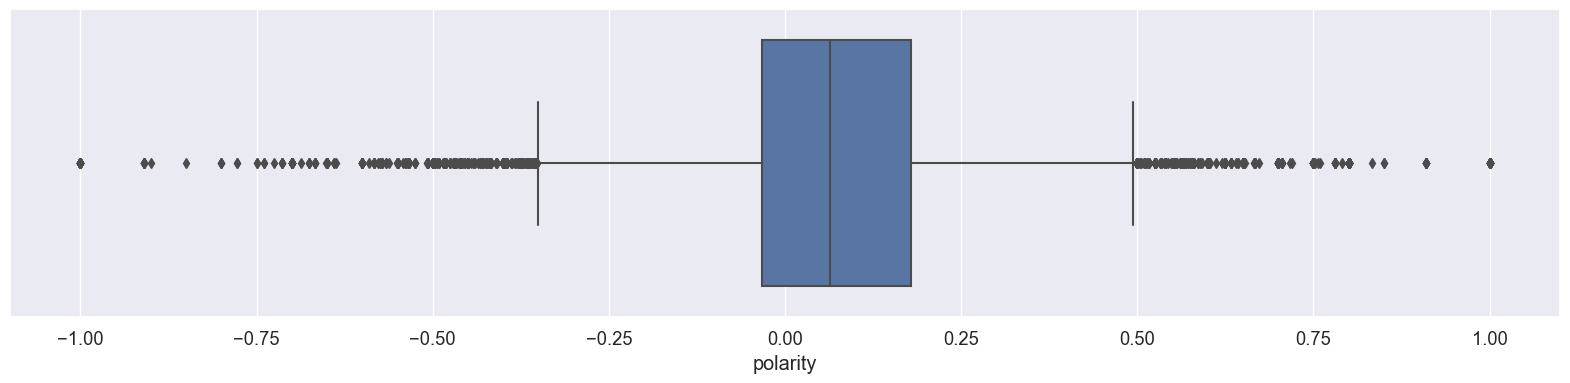

In [93]:
plt.figure(figsize=(20,4))
sns.boxplot(x=data['polarity'])
plt.show()

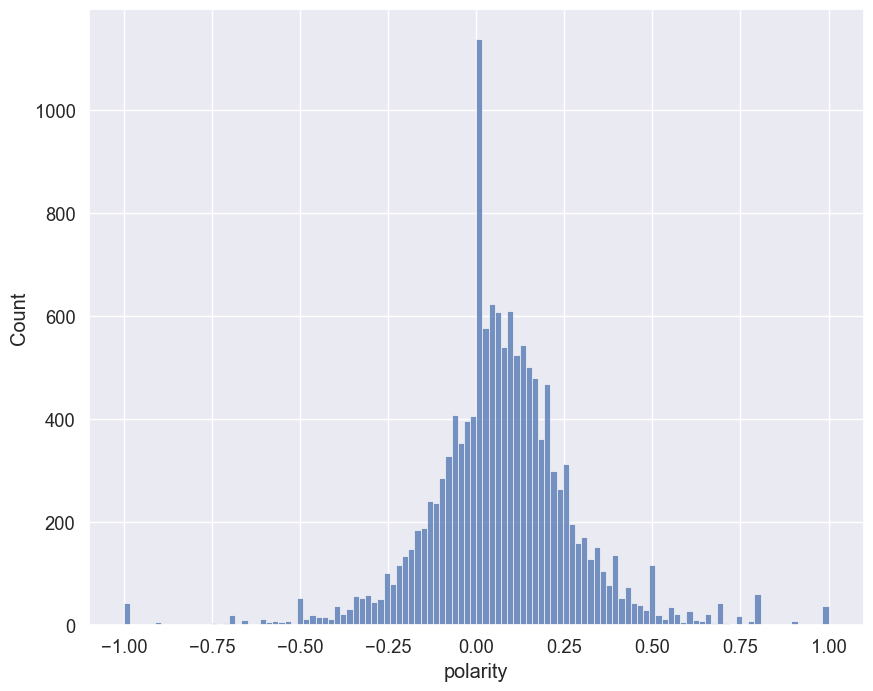

In [94]:
plt.figure(figsize=(10,8))
sns.histplot(data['polarity'])
plt.show()

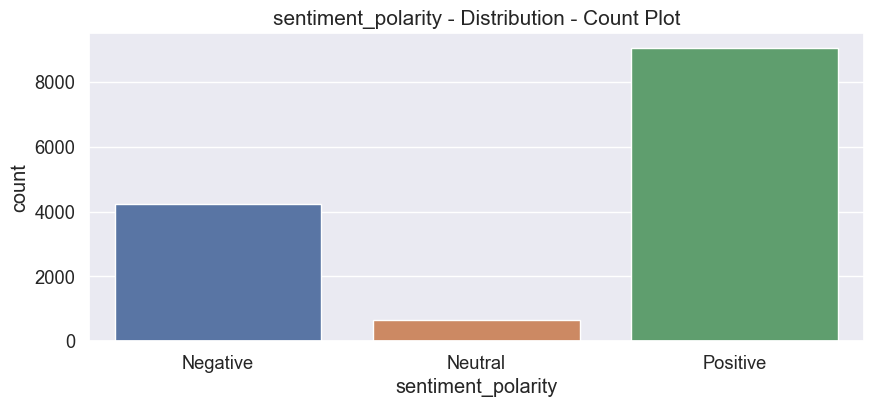

In [95]:
plt.figure(figsize=(10,4))
sns.countplot(x=data.sentiment_polarity)
plt.title('sentiment_polarity - Distribution - Count Plot',size=15)
plt.show()

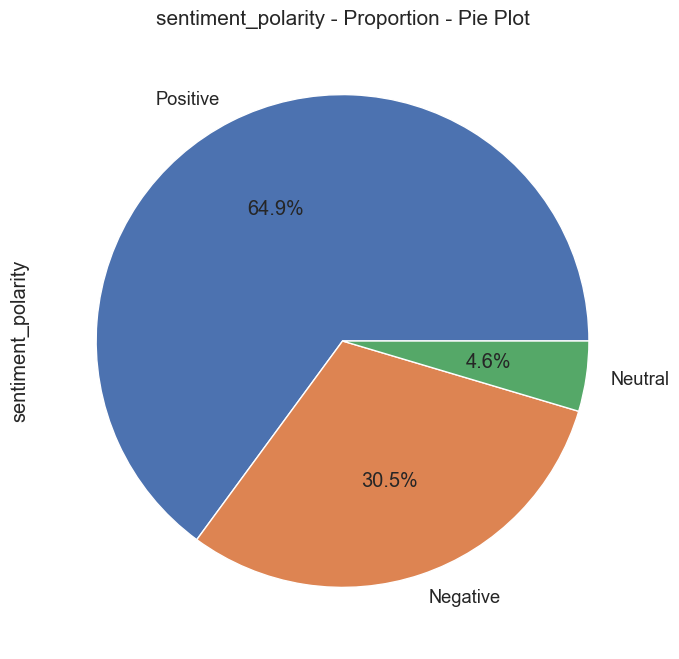

In [96]:
plt.figure(figsize=(8,8))
data.sentiment_polarity.value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title('sentiment_polarity - Proportion - Pie Plot',size=15)
plt.show()

# Sentiment Analysis using Vader Lexicon

In [97]:
SIA = SentimentIntensityAnalyzer()
data['Vader_Lexicon'] = data['Lemmatized_Review'].apply(lambda x : SIA.polarity_scores(x))
data.head()

drugname  condition                                             review  \
0        69          0                      "Gave me terrible headaches."   
1        90          0  "Horrible drug. Didn&#039;t help me with depre...   
2        55          2  "Was put on bystolic for high blood pressure i...   
3       306          1  "Was on .75 for a month as suppose to boost th...   
4       234          0  "Gave me restless, crawly legs on 50mg. It was...   

   rating       date  usefulcount  sentiment_rate  \
0     1.0 2009-11-30            2               1   
1     1.0 2016-02-28           16               1   
2     1.0 2017-10-26            7               1   
3     1.0 2017-09-20            5               1   
4     1.0 2013-02-14           62               1   

                                        review_clean  day  month  ...  \
0                         gave me terrible headaches   30     11  ...   
1  horrible drug didnt help me with depression ma...   28      2  ...   
2  was put on bystolic for high blood pressure in...   26     10  ...   
3  was on  for a month as suppose to boost this u...   20      9  ...   
4  gave me restless crawly legs on mg it was very...   14      2  ...   

   count_words_title  count_stopwords  mean_word_len Review_Sentiment  \
0                  1                1       5.750000              0.0   
1                  1                4       4.105263              0.0   
2                 10               43       4.314815              0.0   
3                 11               54       3.768000              0.0   
4                  5               20       4.208333              0.0   

   polarity   emotion                                  Lemmatized_Review  \
0 -1.000000  negative                          give me terrible headache   
1 -0.700000  negative  horrible drug didn 039 t help me with depressi...   
2 -0.102864  negative  be put on bystolic for high blood pressure ind...   
3 -0.113604  negative  be on 75 for a month as suppose to boost this ...   
4 -0.105556  negative  give me restless crawly legs on 50mg it be ver...   

   subjectivity  sentiment_polarity  \
0      1.000000            Negative   
1      0.800000            Negative   
2      0.666121            Negative   
3      0.533689            Negative   
4      0.283333            Negative   

                                       Vader_Lexicon  
0  {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'comp...  
1  {'neg': 0.423, 'neu': 0.387, 'pos': 0.19, 'com...  
2  {'neg': 0.175, 'neu': 0.811, 'pos': 0.014, 'co...  
3  {'neg': 0.075, 'neu': 0.834, 'pos': 0.091, 'co...  
4  {'neg': 0.151, 'neu': 0.849, 'pos': 0.0, 'comp...  

[5 rows x 31 columns]

In [98]:
data=pd.concat([data.drop(['Vader_Lexicon'],axis=1),data['Vader_Lexicon'].apply(pd.Series)],axis=1)
data.head()

drugname  condition                                             review  \
0        69          0                      "Gave me terrible headaches."   
1        90          0  "Horrible drug. Didn&#039;t help me with depre...   
2        55          2  "Was put on bystolic for high blood pressure i...   
3       306          1  "Was on .75 for a month as suppose to boost th...   
4       234          0  "Gave me restless, crawly legs on 50mg. It was...   

   rating       date  usefulcount  sentiment_rate  \
0     1.0 2009-11-30            2               1   
1     1.0 2016-02-28           16               1   
2     1.0 2017-10-26            7               1   
3     1.0 2017-09-20            5               1   
4     1.0 2013-02-14           62               1   

                                        review_clean  day  month  ...  \
0                         gave me terrible headaches   30     11  ...   
1  horrible drug didnt help me with depression ma...   28      2  ...   
2  was put on bystolic for high blood pressure in...   26     10  ...   
3  was on  for a month as suppose to boost this u...   20      9  ...   
4  gave me restless crawly legs on mg it was very...   14      2  ...   

   Review_Sentiment  polarity   emotion  \
0               0.0 -1.000000  negative   
1               0.0 -0.700000  negative   
2               0.0 -0.102864  negative   
3               0.0 -0.113604  negative   
4               0.0 -0.105556  negative   

                                   Lemmatized_Review  subjectivity  \
0                          give me terrible headache      1.000000   
1  horrible drug didn 039 t help me with depressi...      0.800000   
2  be put on bystolic for high blood pressure ind...      0.666121   
3  be on 75 for a month as suppose to boost this ...      0.533689   
4  give me restless crawly legs on 50mg it be ver...      0.283333   

   sentiment_polarity    neg    neu    pos  compound  
0            Negative  0.508  0.492  0.000   -0.4767  
1            Negative  0.423  0.387  0.190   -0.7650  
2            Negative  0.175  0.811  0.014   -0.9493  
3            Negative  0.075  0.834  0.091    0.2212  
4            Negative  0.151  0.849  0.000   -0.7783  

[5 rows x 34 columns]

In [99]:
def sentiment_analysis_vader_lexicon(compound_value):
  """
  This function takes input as compound value found from Vader Lexicon and try to classify
  whether the review is Positive/Negative/Neutral
  """
  if compound_value>= 0.05:
    return 'Positive'
  elif (compound_value > -0.05) & (compound_value< 0.05):
    return 'Neutral'
  else:
    return 'Negative'
data['Sentiment_Vader_Compound']=data['compound'].apply(lambda x:sentiment_analysis_vader_lexicon(x))
data.head()


drugname  condition                                             review  \
0        69          0                      "Gave me terrible headaches."   
1        90          0  "Horrible drug. Didn&#039;t help me with depre...   
2        55          2  "Was put on bystolic for high blood pressure i...   
3       306          1  "Was on .75 for a month as suppose to boost th...   
4       234          0  "Gave me restless, crawly legs on 50mg. It was...   

   rating       date  usefulcount  sentiment_rate  \
0     1.0 2009-11-30            2               1   
1     1.0 2016-02-28           16               1   
2     1.0 2017-10-26            7               1   
3     1.0 2017-09-20            5               1   
4     1.0 2013-02-14           62               1   

                                        review_clean  day  month  ...  \
0                         gave me terrible headaches   30     11  ...   
1  horrible drug didnt help me with depression ma...   28      2  ...   
2  was put on bystolic for high blood pressure in...   26     10  ...   
3  was on  for a month as suppose to boost this u...   20      9  ...   
4  gave me restless crawly legs on mg it was very...   14      2  ...   

   polarity   emotion                                  Lemmatized_Review  \
0 -1.000000  negative                          give me terrible headache   
1 -0.700000  negative  horrible drug didn 039 t help me with depressi...   
2 -0.102864  negative  be put on bystolic for high blood pressure ind...   
3 -0.113604  negative  be on 75 for a month as suppose to boost this ...   
4 -0.105556  negative  give me restless crawly legs on 50mg it be ver...   

  subjectivity  sentiment_polarity    neg    neu    pos  compound  \
0     1.000000            Negative  0.508  0.492  0.000   -0.4767   
1     0.800000            Negative  0.423  0.387  0.190   -0.7650   
2     0.666121            Negative  0.175  0.811  0.014   -0.9493   
3     0.533689            Negative  0.075  0.834  0.091    0.2212   
4     0.283333            Negative  0.151  0.849  0.000   -0.7783   

   Sentiment_Vader_Compound  
0                  Negative  
1                  Negative  
2                  Negative  
3                  Positive  
4                  Negative  

[5 rows x 35 columns]

In [100]:
data['compound'].describe()

count    13944.000000
mean        -0.085076
std          0.692243
min         -0.996100
25%         -0.783900
50%         -0.153800
75%          0.624900
max          0.994800
Name: compound, dtype: float64

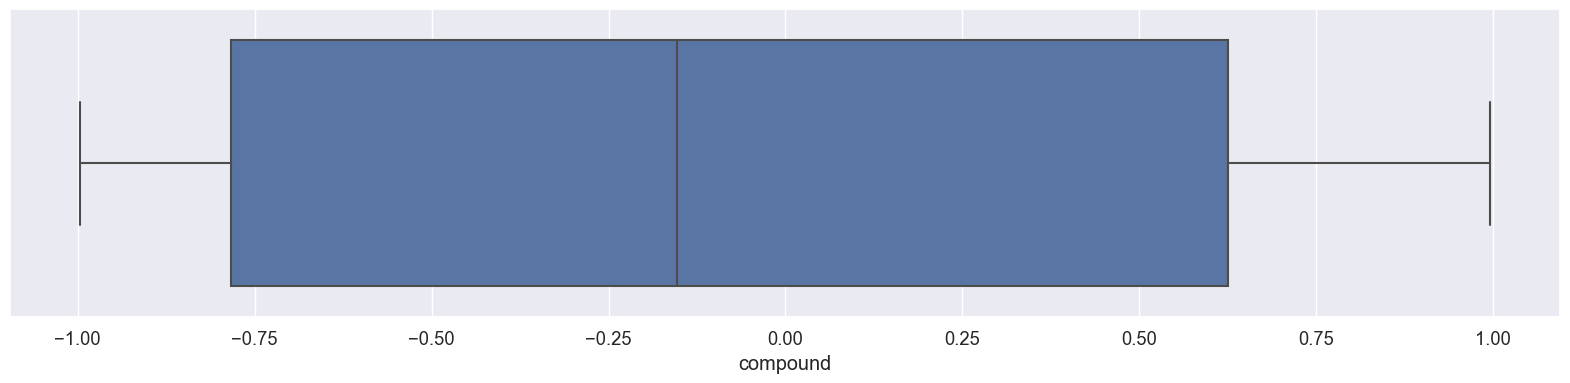

In [101]:
plt.figure(figsize=(20,4))
sns.boxplot(x=data['compound'])
plt.show()

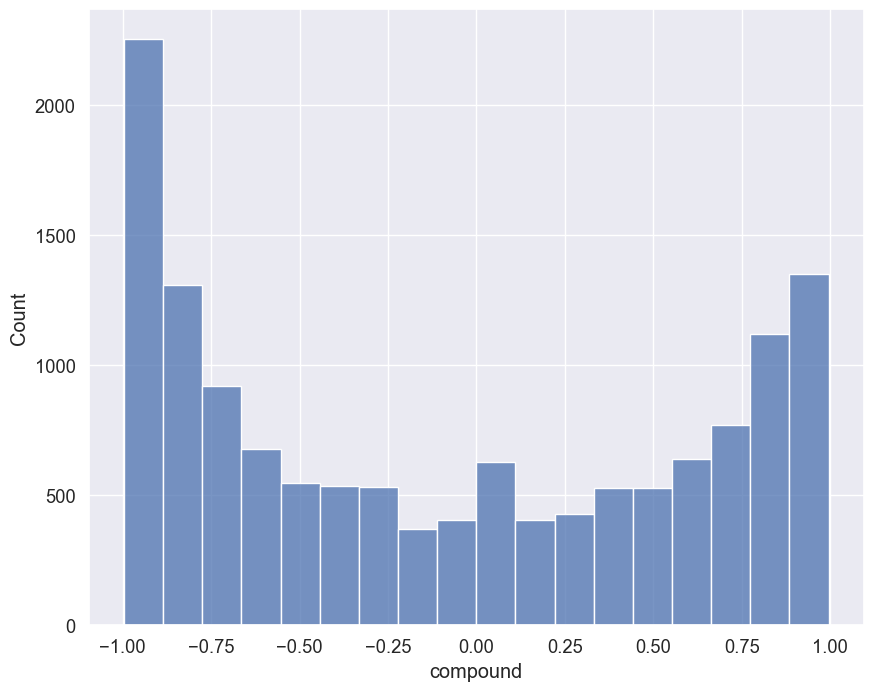

In [102]:
plt.figure(figsize=(10,8))
sns.histplot(data['compound'])
plt.show()

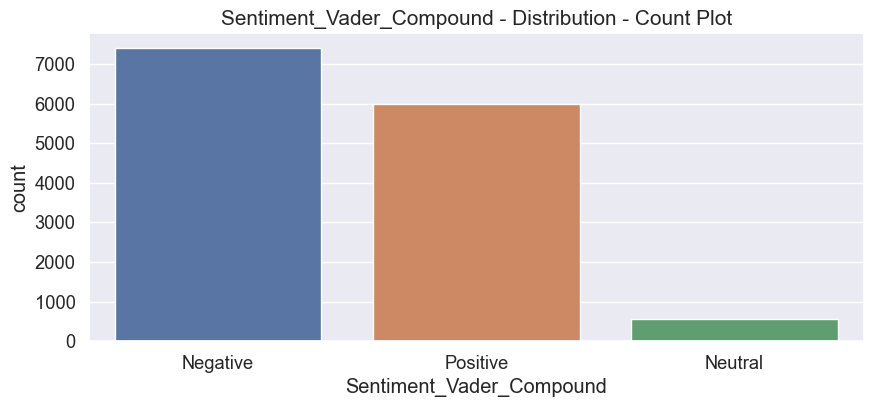

In [103]:
plt.figure(figsize=(10,4))
sns.countplot(x=data.Sentiment_Vader_Compound)
plt.title('Sentiment_Vader_Compound - Distribution - Count Plot',size=15)
plt.show()

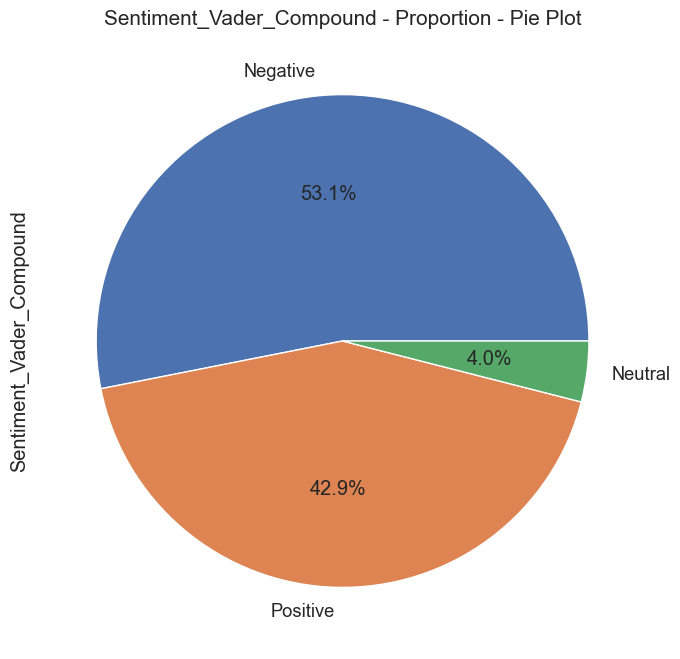

In [104]:
plt.figure(figsize=(8,8))
data.Sentiment_Vader_Compound.value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title('Sentiment_Vader_Compound - Proportion - Pie Plot',size=15)
plt.show()

# Sentiment Analysis using Opinion Lexicon with Spacy
> (Positive/Negative Dataset)

In [105]:
#Import list of positive words. Set the values as 1
positive_words = pd.read_csv('positive-words.txt',header=None,encoding='latin-1',error_bad_lines=False)
positive_words['value']=1
positive_words.head()

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


0  value
0  ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...      1
1                                                 ;       1
2                        ; Opinion Lexicon: Positive      1
3                                                  ;      1
4  ; This file contains a list of POSITIVE opinio...      1

In [106]:

#Import list of negative words. Set the values as -1
negative_words = pd.read_csv('negative-words.txt',header=None,encoding='latin-1',error_bad_lines=False)
negative_words['value']=-1
negative_words.head()

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


0  value
0  ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...     -1
1                                                 ;      -1
2                        ; Opinion Lexicon: Negative     -1
3                                                  ;     -1
4  ; This file contains a list of NEGATIVE opinio...     -1

In [107]:
#Combining both positive and negative words and making it a dictionary.
positive_negative = pd.concat([positive_words,negative_words])
positive_negative_words=positive_negative.set_index(0)['value'].to_dict()
positive_negative_words

{';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;': 1,
 '; ': -1,
 '; Opinion Lexicon: Positive': 1,
 ';': -1,
 '; This file contains a list of POSITIVE opinion words (or sentiment words).': 1,
 '; This file and the papers can all be downloaded from ': -1,
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html': -1,
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ': -1,
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ': -1,
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ': -1,
 '; Notes: ': -1,
 ';    1. The appearance of an opinion word in a sentence does not necessarily  ': -1,
 ';       mean that the sentence expresses a positive or negative opinion. ': -1,
 ';       See the paper below:': -1,
 ';       Bing Liu. "Sentiment Analysis and Subjectivity." An chapter in ': -1,
 ';    2. You will notice many misspelled words in the list. They are not ': -1,
 ';       mistake

In [108]:
nlp=spacy.load('en_core_web_sm')

In [109]:
def sentiment_analysis_spacy(text: str=None):
  """
  This function gets the input string, Use pretrained model "en_core_web_sm" to preprocess the input string,
  Assign each word a sentiment value (+1 for positive words, -1 for negative words) sum it up for each sentence.
  and return the sum value.
  """
  senti_score = 0
  if text:
    sentence = nlp(text)
    for word in sentence:
      senti_score = senti_score + positive_negative_words.get(word.lemma_,0)
  return senti_score

In [110]:
sentiment_analysis_spacy('happy')

1

In [111]:
sentiment_analysis_spacy('sad')

-1

In [112]:
data['sentiment_spacy_score']=data['Lemmatized_Review'].apply(lambda x: sentiment_analysis_spacy(x))
data.head()

drugname  condition                                             review  \
0        69          0                      "Gave me terrible headaches."   
1        90          0  "Horrible drug. Didn&#039;t help me with depre...   
2        55          2  "Was put on bystolic for high blood pressure i...   
3       306          1  "Was on .75 for a month as suppose to boost th...   
4       234          0  "Gave me restless, crawly legs on 50mg. It was...   

   rating       date  usefulcount  sentiment_rate  \
0     1.0 2009-11-30            2               1   
1     1.0 2016-02-28           16               1   
2     1.0 2017-10-26            7               1   
3     1.0 2017-09-20            5               1   
4     1.0 2013-02-14           62               1   

                                        review_clean  day  month  ...  \
0                         gave me terrible headaches   30     11  ...   
1  horrible drug didnt help me with depression ma...   28      2  ...   
2  was put on bystolic for high blood pressure in...   26     10  ...   
3  was on  for a month as suppose to boost this u...   20      9  ...   
4  gave me restless crawly legs on mg it was very...   14      2  ...   

    emotion                                  Lemmatized_Review  subjectivity  \
0  negative                          give me terrible headache      1.000000   
1  negative  horrible drug didn 039 t help me with depressi...      0.800000   
2  negative  be put on bystolic for high blood pressure ind...      0.666121   
3  negative  be on 75 for a month as suppose to boost this ...      0.533689   
4  negative  give me restless crawly legs on 50mg it be ver...      0.283333   

  sentiment_polarity    neg    neu    pos  compound  Sentiment_Vader_Compound  \
0           Negative  0.508  0.492  0.000   -0.4767                  Negative   
1           Negative  0.423  0.387  0.190   -0.7650                  Negative   
2           Negative  0.175  0.811  0.014   -0.9493                  Negative   
3           Negative  0.075  0.834  0.091    0.2212                  Positive   
4           Negative  0.151  0.849  0.000   -0.7783                  Negative   

   sentiment_spacy_score  
0                     -2  
1                     -4  
2                     -6  
3                     -6  
4                     -3  

[5 rows x 36 columns]

In [113]:
def spacy_score(score):
  """
  This function takes sentiment_spacy_pos_neg score found from Spacy sentiment and try to classify whether the review is Positive/Negative/Neutral
  """
  if score>0:
    return('Positive')
  elif score==0:
    return('Neutral')
  else:
    return('Negative')
data['sentiment_spacy']=data['sentiment_spacy_score'].apply(spacy_score)
data.head()

drugname  condition                                             review  \
0        69          0                      "Gave me terrible headaches."   
1        90          0  "Horrible drug. Didn&#039;t help me with depre...   
2        55          2  "Was put on bystolic for high blood pressure i...   
3       306          1  "Was on .75 for a month as suppose to boost th...   
4       234          0  "Gave me restless, crawly legs on 50mg. It was...   

   rating       date  usefulcount  sentiment_rate  \
0     1.0 2009-11-30            2               1   
1     1.0 2016-02-28           16               1   
2     1.0 2017-10-26            7               1   
3     1.0 2017-09-20            5               1   
4     1.0 2013-02-14           62               1   

                                        review_clean  day  month  ...  \
0                         gave me terrible headaches   30     11  ...   
1  horrible drug didnt help me with depression ma...   28      2  ...   
2  was put on bystolic for high blood pressure in...   26     10  ...   
3  was on  for a month as suppose to boost this u...   20      9  ...   
4  gave me restless crawly legs on mg it was very...   14      2  ...   

                                   Lemmatized_Review  subjectivity  \
0                          give me terrible headache      1.000000   
1  horrible drug didn 039 t help me with depressi...      0.800000   
2  be put on bystolic for high blood pressure ind...      0.666121   
3  be on 75 for a month as suppose to boost this ...      0.533689   
4  give me restless crawly legs on 50mg it be ver...      0.283333   

   sentiment_polarity    neg    neu    pos  compound  \
0            Negative  0.508  0.492  0.000   -0.4767   
1            Negative  0.423  0.387  0.190   -0.7650   
2            Negative  0.175  0.811  0.014   -0.9493   
3            Negative  0.075  0.834  0.091    0.2212   
4            Negative  0.151  0.849  0.000   -0.7783   

   Sentiment_Vader_Compound  sentiment_spacy_score  sentiment_spacy  
0                  Negative                     -2         Negative  
1                  Negative                     -4         Negative  
2                  Negative                     -6         Negative  
3                  Positive                     -6         Negative  
4                  Negative                     -3         Negative  

[5 rows x 37 columns]

In [114]:
data['sentiment_spacy_score'].describe()

count    13944.000000
mean        -1.255235
std          3.561839
min        -20.000000
25%         -3.000000
50%         -1.000000
75%          1.000000
max         14.000000
Name: sentiment_spacy_score, dtype: float64

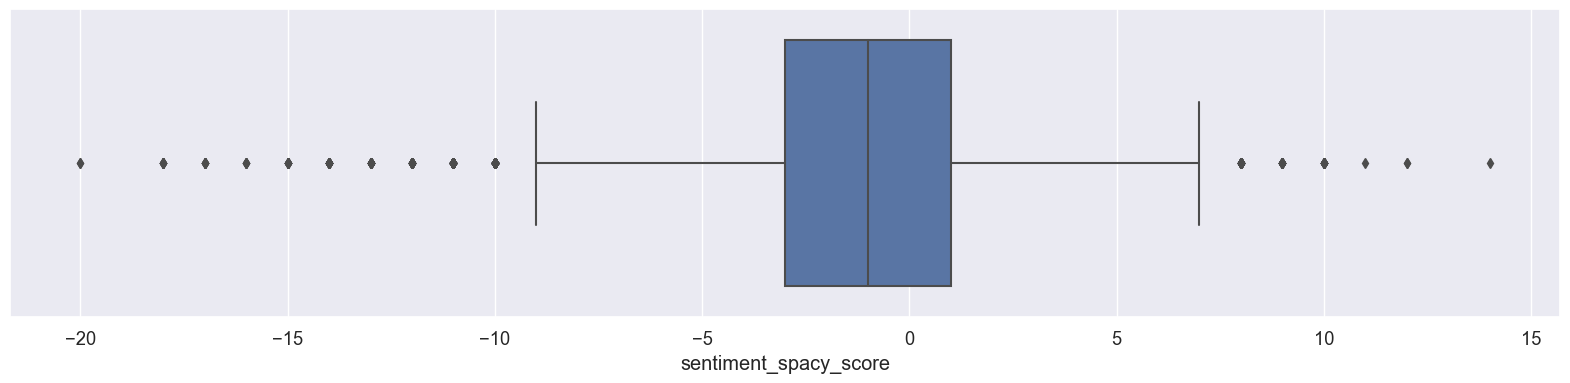

In [115]:
plt.figure(figsize=(20,4))
sns.boxplot(x=data['sentiment_spacy_score'])
plt.show()

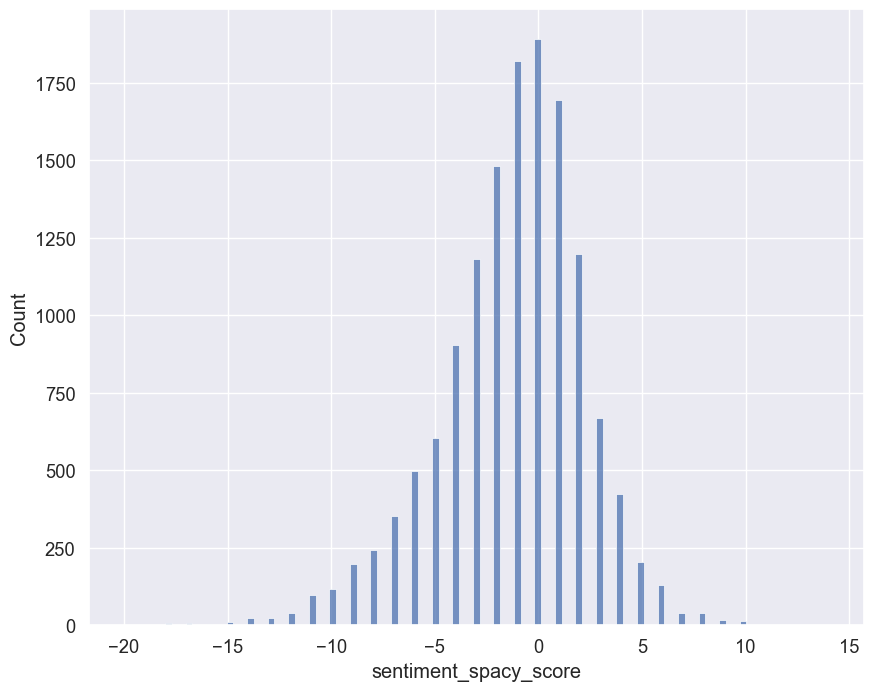

In [116]:
plt.figure(figsize=(10,8))
sns.histplot(data['sentiment_spacy_score'])
plt.show()

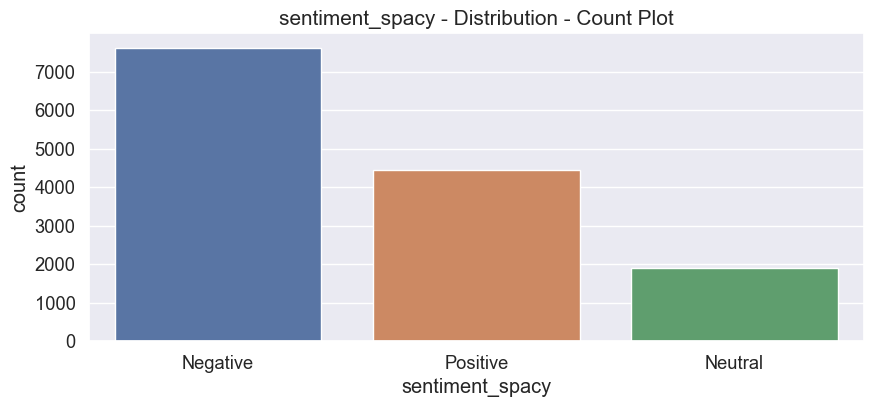

In [117]:
plt.figure(figsize=(10,4))
sns.countplot(x=data.sentiment_spacy)
plt.title('sentiment_spacy - Distribution - Count Plot',size=15)
plt.show()

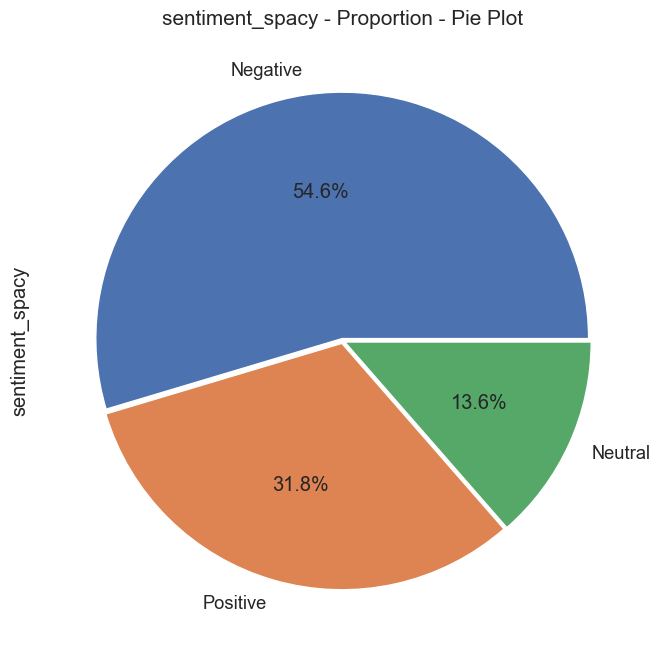

In [118]:
plt.figure(figsize=(8,8))
data.sentiment_spacy.value_counts().plot(kind='pie',explode=[0.01,0.01,0.01],autopct='%.1f%%')
plt.title('sentiment_spacy - Proportion - Pie Plot',size=15)
plt.show()

# Finding Number of Characters for each Review

In [119]:
data['no_chars']=data['Lemmatized_Review'].apply(lambda x : len(x))
data.head()

drugname  condition                                             review  \
0        69          0                      "Gave me terrible headaches."   
1        90          0  "Horrible drug. Didn&#039;t help me with depre...   
2        55          2  "Was put on bystolic for high blood pressure i...   
3       306          1  "Was on .75 for a month as suppose to boost th...   
4       234          0  "Gave me restless, crawly legs on 50mg. It was...   

   rating       date  usefulcount  sentiment_rate  \
0     1.0 2009-11-30            2               1   
1     1.0 2016-02-28           16               1   
2     1.0 2017-10-26            7               1   
3     1.0 2017-09-20            5               1   
4     1.0 2013-02-14           62               1   

                                        review_clean  day  month  ...  \
0                         gave me terrible headaches   30     11  ...   
1  horrible drug didnt help me with depression ma...   28      2  ...   
2  was put on bystolic for high blood pressure in...   26     10  ...   
3  was on  for a month as suppose to boost this u...   20      9  ...   
4  gave me restless crawly legs on mg it was very...   14      2  ...   

   subjectivity  sentiment_polarity    neg    neu    pos  compound  \
0      1.000000            Negative  0.508  0.492  0.000   -0.4767   
1      0.800000            Negative  0.423  0.387  0.190   -0.7650   
2      0.666121            Negative  0.175  0.811  0.014   -0.9493   
3      0.533689            Negative  0.075  0.834  0.091    0.2212   
4      0.283333            Negative  0.151  0.849  0.000   -0.7783   

   Sentiment_Vader_Compound  sentiment_spacy_score  sentiment_spacy  no_chars  
0                  Negative                     -2         Negative        25  
1                  Negative                     -4         Negative        96  
2                  Negative                     -6         Negative       549  
3                  Positive                     -6         Negative       556  
4                  Negative                     -3         Negative       240  

[5 rows x 38 columns]

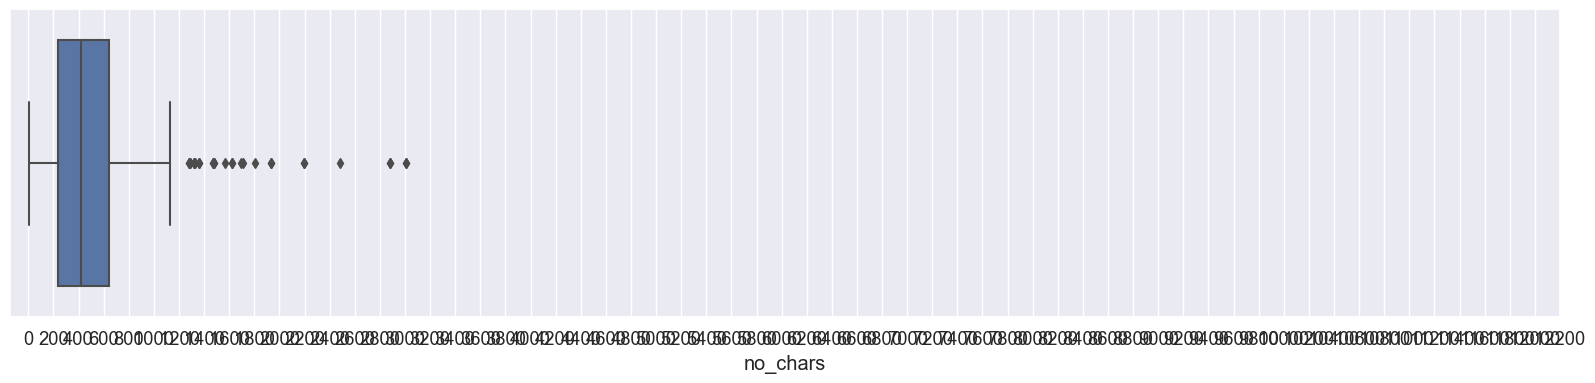

In [120]:
plt.figure(figsize=(20,4))
fig=sns.boxplot(x=data['no_chars'])
plt.xticks(np.arange(0, 12400, step=200))
plt.show()

In [121]:
data['no_chars'].describe()

count    13944.000000
mean       422.610513
std        227.427913
min          4.000000
25%        236.000000
50%        417.000000
75%        641.000000
max       3009.000000
Name: no_chars, dtype: float64

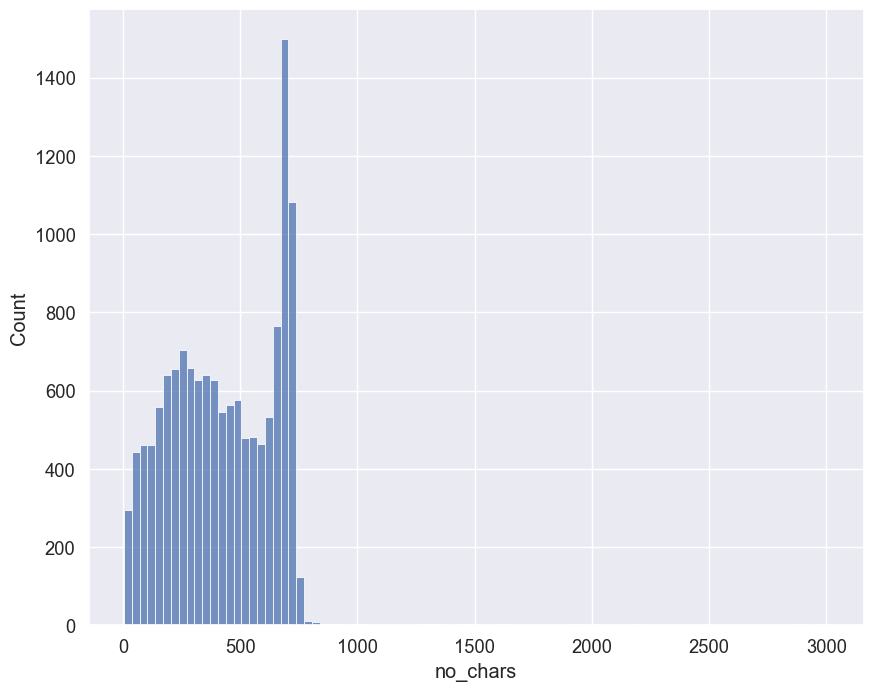

In [122]:
plt.figure(figsize=(10,8))
sns.histplot(data['no_chars'])
plt.show()

# Finding Number of Words for each Review

In [123]:
data['no_words']=data['Lemmatized_Review'].apply(lambda x : len(x.split(" ")))
data.head()

drugname  condition                                             review  \
0        69          0                      "Gave me terrible headaches."   
1        90          0  "Horrible drug. Didn&#039;t help me with depre...   
2        55          2  "Was put on bystolic for high blood pressure i...   
3       306          1  "Was on .75 for a month as suppose to boost th...   
4       234          0  "Gave me restless, crawly legs on 50mg. It was...   

   rating       date  usefulcount  sentiment_rate  \
0     1.0 2009-11-30            2               1   
1     1.0 2016-02-28           16               1   
2     1.0 2017-10-26            7               1   
3     1.0 2017-09-20            5               1   
4     1.0 2013-02-14           62               1   

                                        review_clean  day  month  ...  \
0                         gave me terrible headaches   30     11  ...   
1  horrible drug didnt help me with depression ma...   28      2  ...   
2  was put on bystolic for high blood pressure in...   26     10  ...   
3  was on  for a month as suppose to boost this u...   20      9  ...   
4  gave me restless crawly legs on mg it was very...   14      2  ...   

   sentiment_polarity    neg    neu    pos  compound  \
0            Negative  0.508  0.492  0.000   -0.4767   
1            Negative  0.423  0.387  0.190   -0.7650   
2            Negative  0.175  0.811  0.014   -0.9493   
3            Negative  0.075  0.834  0.091    0.2212   
4            Negative  0.151  0.849  0.000   -0.7783   

   Sentiment_Vader_Compound  sentiment_spacy_score  sentiment_spacy  no_chars  \
0                  Negative                     -2         Negative        25   
1                  Negative                     -4         Negative        96   
2                  Negative                     -6         Negative       549   
3                  Positive                     -6         Negative       556   
4                  Negative                     -3         Negative       240   

   no_words  
0         4  
1        19  
2       108  
3       125  
4        48  

[5 rows x 39 columns]

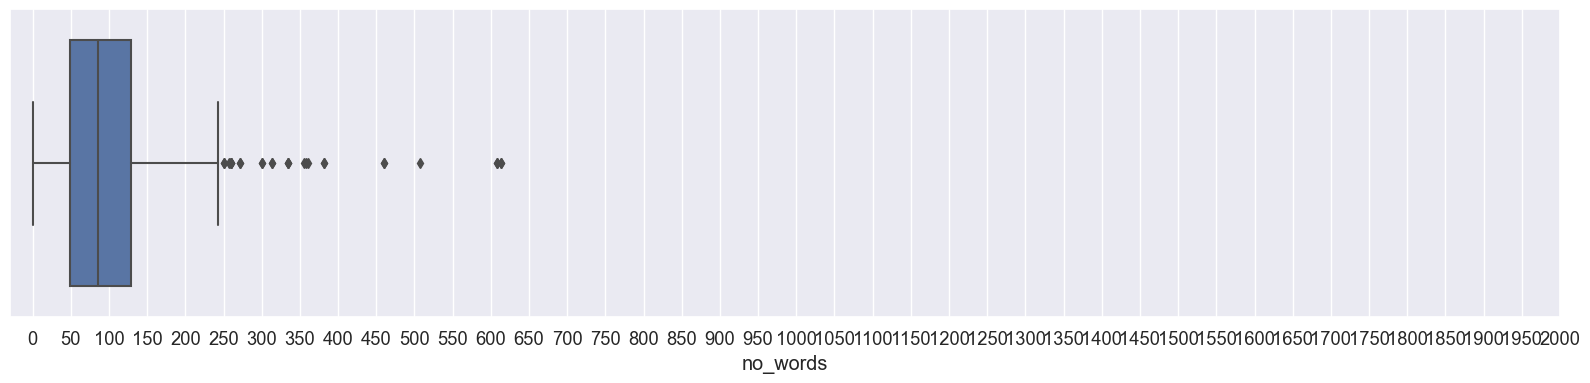

In [124]:
plt.figure(figsize=(20,4))
sns.boxplot(x=data['no_words'])
plt.xticks(np.arange(0, 2050, step=50))
plt.show()

In [125]:
data['no_words'].describe()

count    13944.000000
mean        86.874068
std         47.034130
min          1.000000
25%         49.000000
50%         86.000000
75%        129.000000
max        613.000000
Name: no_words, dtype: float64

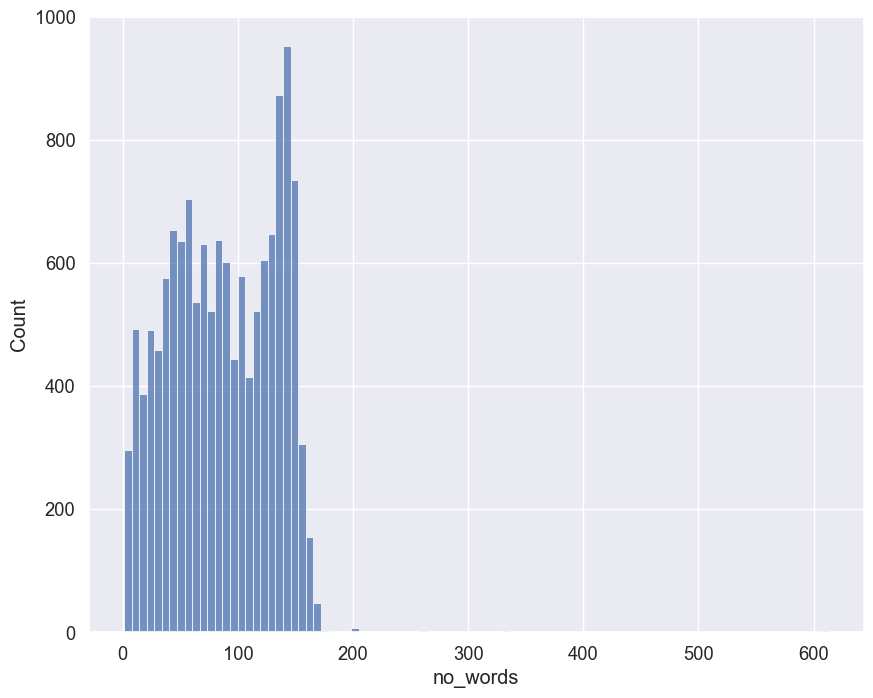

In [126]:
plt.figure(figsize=(10,8))
sns.histplot(data['no_words'])
plt.show()

In [127]:
data.rename(columns={'neg':'neg_senti_score','neu':'neu_senti_score','pos':'pos_senti_score'},inplace=True)
data.head()

drugname  condition                                             review  \
0        69          0                      "Gave me terrible headaches."   
1        90          0  "Horrible drug. Didn&#039;t help me with depre...   
2        55          2  "Was put on bystolic for high blood pressure i...   
3       306          1  "Was on .75 for a month as suppose to boost th...   
4       234          0  "Gave me restless, crawly legs on 50mg. It was...   

   rating       date  usefulcount  sentiment_rate  \
0     1.0 2009-11-30            2               1   
1     1.0 2016-02-28           16               1   
2     1.0 2017-10-26            7               1   
3     1.0 2017-09-20            5               1   
4     1.0 2013-02-14           62               1   

                                        review_clean  day  month  ...  \
0                         gave me terrible headaches   30     11  ...   
1  horrible drug didnt help me with depression ma...   28      2  ...   
2  was put on bystolic for high blood pressure in...   26     10  ...   
3  was on  for a month as suppose to boost this u...   20      9  ...   
4  gave me restless crawly legs on mg it was very...   14      2  ...   

   sentiment_polarity  neg_senti_score  neu_senti_score pos_senti_score  \
0            Negative            0.508            0.492           0.000   
1            Negative            0.423            0.387           0.190   
2            Negative            0.175            0.811           0.014   
3            Negative            0.075            0.834           0.091   
4            Negative            0.151            0.849           0.000   

   compound  Sentiment_Vader_Compound  sentiment_spacy_score  sentiment_spacy  \
0   -0.4767                  Negative                     -2         Negative   
1   -0.7650                  Negative                     -4         Negative   
2   -0.9493                  Negative                     -6         Negative   
3    0.2212                  Positive                     -6         Negative   
4   -0.7783                  Negative                     -3         Negative   

   no_chars  no_words  
0        25         4  
1        96        19  
2       549       108  
3       556       125  
4       240        48  

[5 rows x 39 columns]

# Rating Vs Sentiment using TextBlob Polarity

In [128]:
rating_vs_sentiment_polarity = pd.crosstab(index=data['rating'],columns=data['sentiment_polarity'],
                                           values=data['sentiment_polarity'],aggfunc='count')
rating_vs_sentiment_polarity

sentiment_polarity  Negative  Neutral  Positive
rating                                         
1.0                     1093      147       562
2.0                      344       25       276
3.0                      251       33       298
4.0                      208       23       227
5.0                      285       42       429
6.0                      212       36       432
7.0                      311       31       653
8.0                      455       62      1278
9.0                      497       85      1886
10.0                     593      158      3012

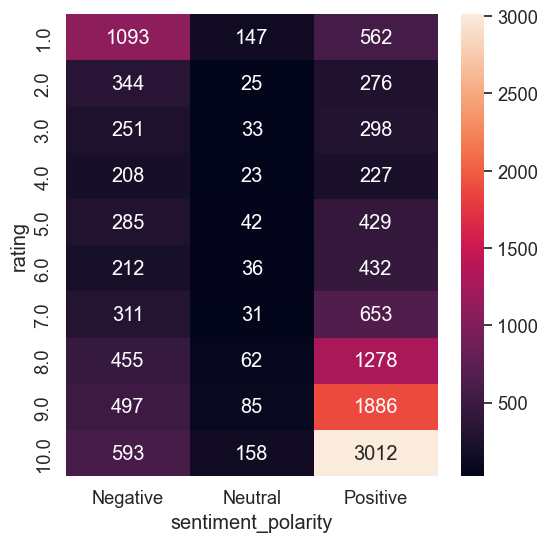

In [129]:
plt.figure(figsize=(6,6))
sns.heatmap(rating_vs_sentiment_polarity,annot=True,fmt='g')
plt.show()

In [130]:
analysis_polarity = rating_vs_sentiment_polarity
analysis_polarity['No. of Reviews']=data['rating'].value_counts()
analysis_polarity['% Positive']=((analysis_polarity['Positive']/analysis_polarity['No. of Reviews'])*100).round(2)
analysis_polarity['% Neutral']=((analysis_polarity['Neutral']/analysis_polarity['No. of Reviews'])*100).round(2)
analysis_polarity['% Negative']=((analysis_polarity['Negative']/analysis_polarity['No. of Reviews'])*100).round(2)
analysis_polarity

sentiment_polarity  Negative  Neutral  Positive  No. of Reviews  % Positive  \
rating                                                                        
1.0                     1093      147       562            1802       31.19   
2.0                      344       25       276             645       42.79   
3.0                      251       33       298             582       51.20   
4.0                      208       23       227             458       49.56   
5.0                      285       42       429             756       56.75   
6.0                      212       36       432             680       63.53   
7.0                      311       31       653             995       65.63   
8.0                      455       62      1278            1795       71.20   
9.0                      497       85      1886            2468       76.42   
10.0                     593      158      3012            3763       80.04   

sentiment_polarity  % Neutral  % Negative  
rating                                     
1.0                      8.16       60.65  
2.0                      3.88       53.33  
3.0                      5.67       43.13  
4.0                      5.02       45.41  
5.0                      5.56       37.70  
6.0                      5.29       31.18  
7.0                      3.12       31.26  
8.0                      3.45       25.35  
9.0                      3.44       20.14  
10.0                     4.20       15.76

# Rating Vs Sentiment using Vader Lexicon

In [131]:
rating_vs_Sentiment_Vader_Compound = pd.crosstab(index=data['rating'],columns=data['Sentiment_Vader_Compound'],
                                                 values=data['Sentiment_Vader_Compound'],aggfunc='count')
rating_vs_Sentiment_Vader_Compound

Sentiment_Vader_Compound  Negative  Neutral  Positive
rating                                               
1.0                           1445       71       286
2.0                            493       31       121
3.0                            394       29       159
4.0                            306       19       133
5.0                            477       35       244
6.0                            405       27       248
7.0                            562       38       395
8.0                            857       66       872
9.0                           1025      103      1340
10.0                          1441      136      2186

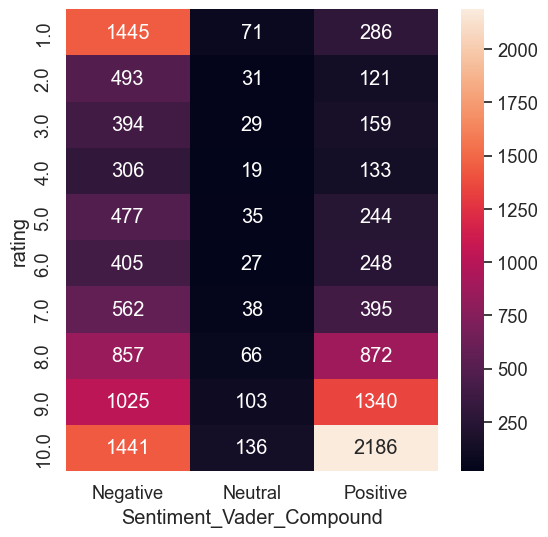

In [132]:
plt.figure(figsize=(6,6))
sns.heatmap(rating_vs_Sentiment_Vader_Compound,annot=True,fmt='g')
plt.show()

In [133]:
analysis_vader_lexicon = rating_vs_Sentiment_Vader_Compound
analysis_vader_lexicon['No. of Reviews']=data['rating'].value_counts()
analysis_vader_lexicon['% Positive']=((analysis_vader_lexicon['Positive']/analysis_vader_lexicon['No. of Reviews'])*100).round(2)
analysis_vader_lexicon['% Neutral']=((analysis_vader_lexicon['Neutral']/analysis_vader_lexicon['No. of Reviews'])*100).round(2)
analysis_vader_lexicon['% Negative']=((analysis_vader_lexicon['Negative']/analysis_vader_lexicon['No. of Reviews'])*100).round(2)
analysis_vader_lexicon

Sentiment_Vader_Compound  Negative  Neutral  Positive  No. of Reviews  \
rating                                                                  
1.0                           1445       71       286            1802   
2.0                            493       31       121             645   
3.0                            394       29       159             582   
4.0                            306       19       133             458   
5.0                            477       35       244             756   
6.0                            405       27       248             680   
7.0                            562       38       395             995   
8.0                            857       66       872            1795   
9.0                           1025      103      1340            2468   
10.0                          1441      136      2186            3763   

Sentiment_Vader_Compound  % Positive  % Neutral  % Negative  
rating                                                       
1.0                            15.87       3.94       80.19  
2.0                            18.76       4.81       76.43  
3.0                            27.32       4.98       67.70  
4.0                            29.04       4.15       66.81  
5.0                            32.28       4.63       63.10  
6.0                            36.47       3.97       59.56  
7.0                            39.70       3.82       56.48  
8.0                            48.58       3.68       47.74  
9.0                            54.29       4.17       41.53  
10.0                           58.09       3.61       38.29

# Rating Vs Sentiment using Opinion Lexicon with Spacy

In [134]:
rating_vs_sentiment_spacy = pd.crosstab(index=data['rating'],columns=data['sentiment_spacy'],
                                           values=data['sentiment_spacy'],aggfunc='count')
rating_vs_sentiment_spacy

sentiment_spacy  Negative  Neutral  Positive
rating                                      
1.0                  1425      177       200
2.0                   467       81        97
3.0                   381       65       136
4.0                   302       61        95
5.0                   469      101       186
6.0                   404      113       163
7.0                   578      145       272
8.0                   926      267       602
9.0                  1153      358       957
10.0                 1512      525      1726

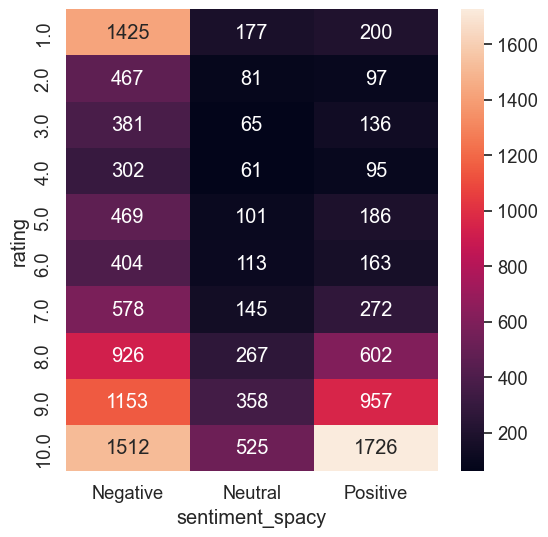

In [135]:
plt.figure(figsize=(6,6))
sns.heatmap(rating_vs_sentiment_spacy,annot=True,fmt='g')
plt.show()

In [136]:
analysis_spacy = rating_vs_sentiment_spacy
analysis_spacy['No. of Reviews']=data['rating'].value_counts()
analysis_spacy['% Positive']=((analysis_spacy['Positive']/analysis_spacy['No. of Reviews'])*100).round(2)
analysis_spacy['% Neutral']=((analysis_spacy['Neutral']/analysis_spacy['No. of Reviews'])*100).round(2)
analysis_spacy['% Negative']=((analysis_spacy['Negative']/analysis_spacy['No. of Reviews'])*100).round(2)
analysis_spacy

sentiment_spacy  Negative  Neutral  Positive  No. of Reviews  % Positive  \
rating                                                                     
1.0                  1425      177       200            1802       11.10   
2.0                   467       81        97             645       15.04   
3.0                   381       65       136             582       23.37   
4.0                   302       61        95             458       20.74   
5.0                   469      101       186             756       24.60   
6.0                   404      113       163             680       23.97   
7.0                   578      145       272             995       27.34   
8.0                   926      267       602            1795       33.54   
9.0                  1153      358       957            2468       38.78   
10.0                 1512      525      1726            3763       45.87   

sentiment_spacy  % Neutral  % Negative  
rating                                  
1.0                   9.82       79.08  
2.0                  12.56       72.40  
3.0                  11.17       65.46  
4.0                  13.32       65.94  
5.0                  13.36       62.04  
6.0                  16.62       59.41  
7.0                  14.57       58.09  
8.0                  14.87       51.59  
9.0                  14.51       46.72  
10.0                 13.95       40.18

In [137]:
df_positive=data[data['no_words']>100].sort_values("sentiment_spacy_score",ascending=False)[["Lemmatized_Review","rating","sentiment_spacy_score"]]
df_positive.head(1)

Lemmatized_Review  rating  \
12111  i have be on 75mg er of venlafaxine hcl for ov...    10.0   

       sentiment_spacy_score  
12111                     14

In [138]:
data['review'][12111]

'"I have been on 75mg ER of Venlafaxine HCL for over 3 months now and I really feel wonderful.   It&#039;s working very well for me.  I have plenty of energy, lost about 20 pounds of weight and I do feel very content and calm.  I do have vivid dreams that are interesting and long.  I socialize and react very well with people now and no longer have any fears of socializing with groups of people.   Again, this antidepressant, has so far, worked very well with me and I am happy that my doctor switched me from 20mg of citalopram, which made me very tired and gain way to much weight,  to 75mg Effixor  ER (Venlafaxine).   Everyone&#039;s system is a bit different and what may work well for someone may not work well for someone else.  I wish you all the best."'

In [139]:
data.loc[12111]

drugname                                                                  313
condition                                                                   0
review                      "I have been on 75mg ER of Venlafaxine HCL for...
rating                                                                   10.0
date                                                      2016-09-10 00:00:00
usefulcount                                                                45
sentiment_rate                                                              5
review_clean                i have been on mg er of venlafaxine hcl for ov...
day                                                                        10
month                                                                       9
year                                                                     2016
sentiment                                                            0.278438
sentiment_clean                                                 

# Most Negative Review

In [140]:
df_negative=data[data['no_words']>100].sort_values("sentiment_spacy_score",ascending=True)[["Lemmatized_Review","rating","sentiment_spacy_score"]]
df_negative.head(1)

Lemmatized_Review  rating  \
2554  i suffer from ptsd anxiety and depression i be...     3.0   

      sentiment_spacy_score  
2554                    -20

In [141]:
data['review'][2554]

'"I suffer from PTSD, anxiety and depression. I was given this medicine to help with focus. It reacted in my system as an &#039;old school&#039; prescription diet pill and exacerbated my symptoms. Reaction included the following symptoms over a period of 4 days:  Dry mouth, feeling dehydrated, crawling skin and scalp. Moderate sinus and eye tension headaches, intense neck and shoulder tension. Sleeping issues, very focused and specific brooding thoughts of death and dying, increased racing thoughts. Blood pressure shifts, heart palpitations, easily confused and major short term memory disruption. Extreme Panic/anxiety attacks with &#039;shock&#039; effects."'

In [142]:
data.loc[2554]

drugname                                                                   34
condition                                                                   0
review                      "I suffer from PTSD, anxiety and depression. I...
rating                                                                    3.0
date                                                      2012-06-18 00:00:00
usefulcount                                                                17
sentiment_rate                                                              2
review_clean                i suffer from ptsd anxiety and depression i wa...
day                                                                        18
month                                                                       6
year                                                                     2012
sentiment                                                           -0.012917
sentiment_clean                                                 

In [143]:
def get_top_n_words(data,n=None,ngram=None):
  """
  This function takes review as input and provide most frequent Bi-Gram or Tri-Gram Words.
  """
  vect_n_grams=CountVectorizer(max_features=2000,ngram_range=ngram).fit(data)
  bag_of_words=vect_n_grams.transform(data)
  sum_of_words=bag_of_words.sum(axis=0)
  word_frequency=[(word,sum_of_words[0,idx]) for word,idx in vect_n_grams.vocabulary_.items()]
  word_frequency=sorted(word_frequency,key=lambda x : x[1],reverse=True)
  return word_frequency[:n]

# Bi-Gram

In [144]:
df_pos = data[data['sentiment_spacy']=='Positive']
df_neg = data[data['sentiment_spacy']=='Negative']

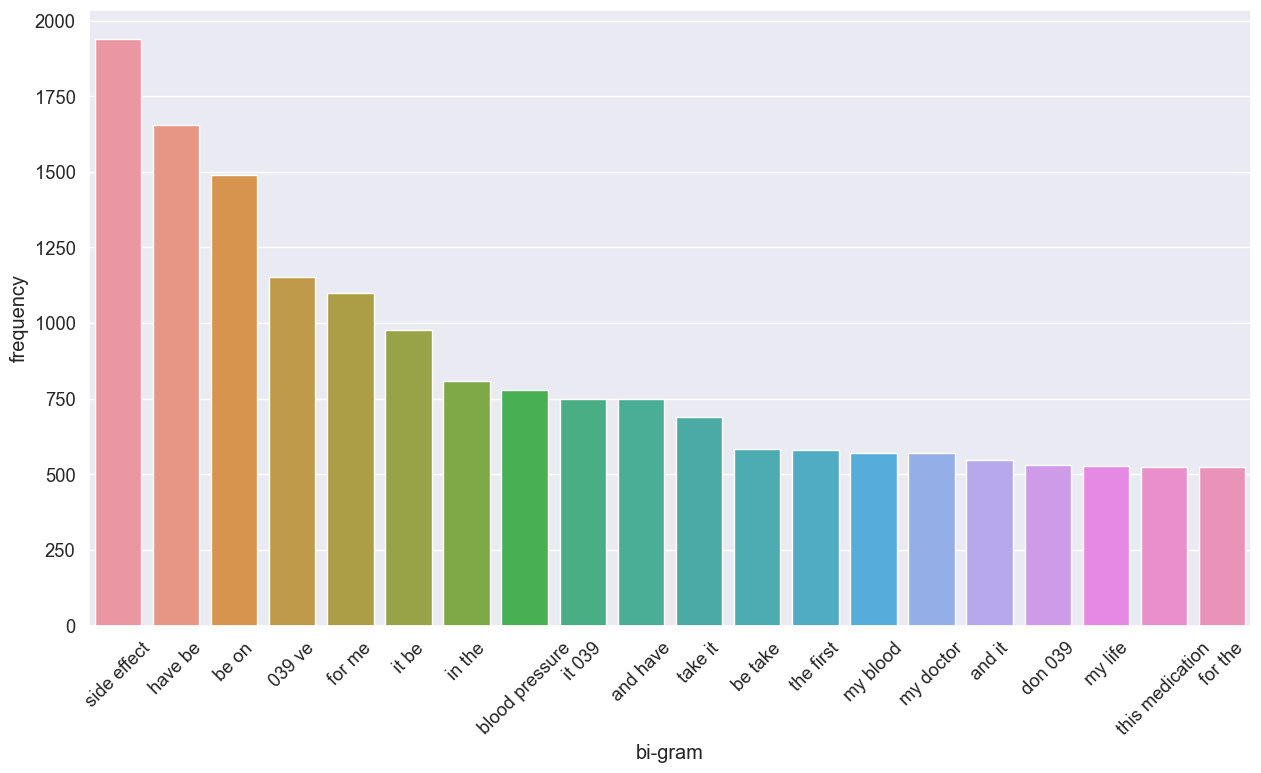

In [145]:
top_20_pos_bigram=get_top_n_words(df_pos['Lemmatized_Review'],n=20,ngram=(2,2))
top_20_pos_bigram=pd.DataFrame(top_20_pos_bigram,columns=['bi-gram','frequency'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='bi-gram',y='frequency',data=top_20_pos_bigram)
fig.set_xticklabels(rotation=45,labels=top_20_pos_bigram['bi-gram'])
plt.show()

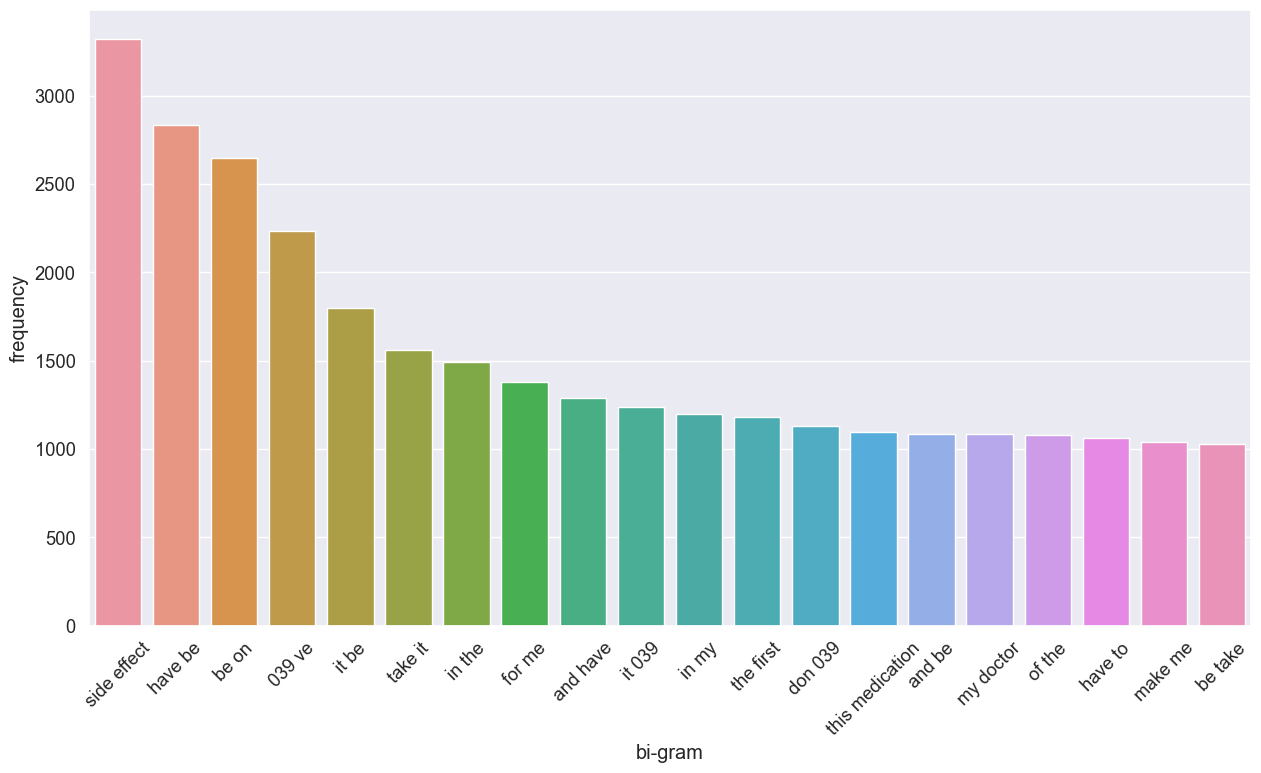

In [146]:
top_20_neg_bigram=get_top_n_words(df_neg['Lemmatized_Review'],n=20,ngram=(2,2))
top_20_neg_bigram=pd.DataFrame(top_20_neg_bigram,columns=['bi-gram','frequency'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='bi-gram',y='frequency',data=top_20_neg_bigram)
fig.set_xticklabels(rotation=45,labels=top_20_neg_bigram['bi-gram'])
plt.show()

# Tri Gram

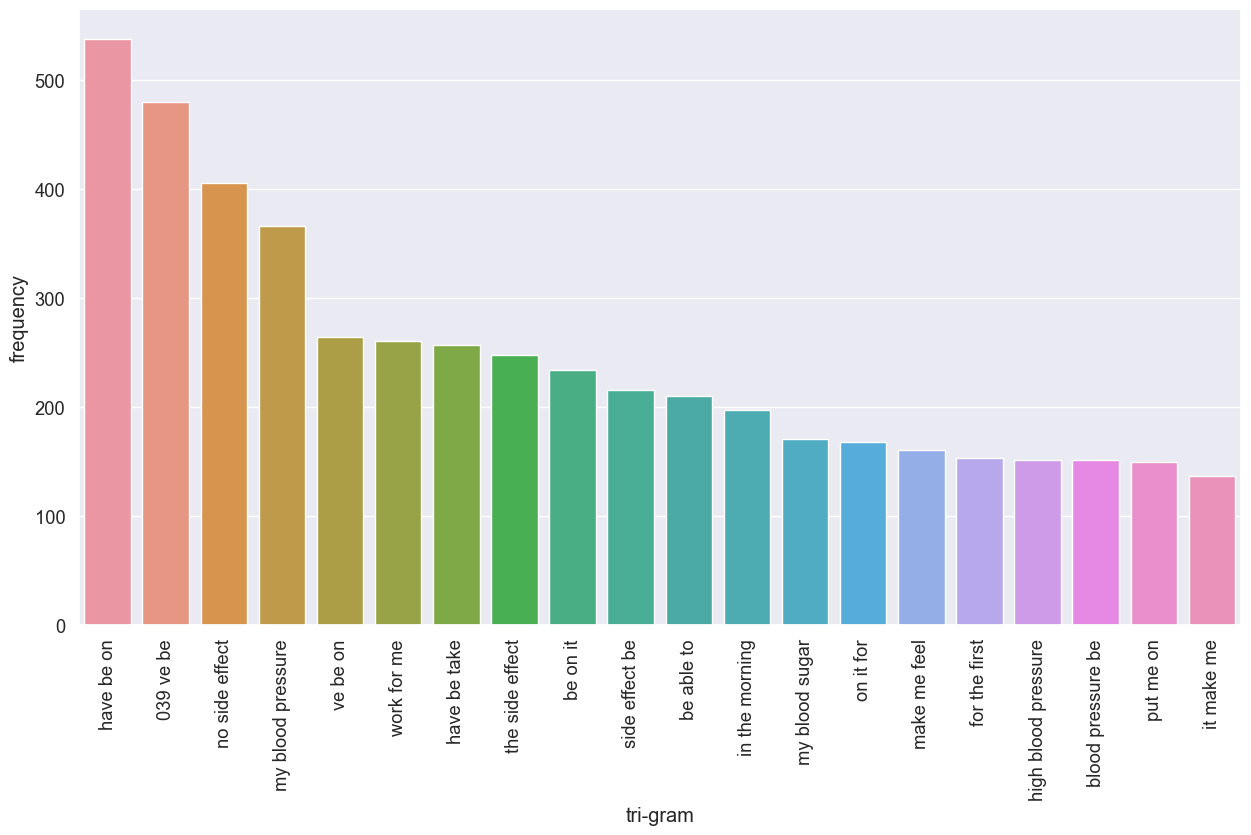

In [147]:
top_20_pos_trigram=get_top_n_words(df_pos['Lemmatized_Review'],n=20,ngram=(3,3))
top_20_pos_trigram=pd.DataFrame(top_20_pos_trigram,columns=['tri-gram','frequency'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='tri-gram',y='frequency',data=top_20_pos_trigram)
fig.set_xticklabels(rotation=90,labels=top_20_pos_trigram['tri-gram'])
plt.show()

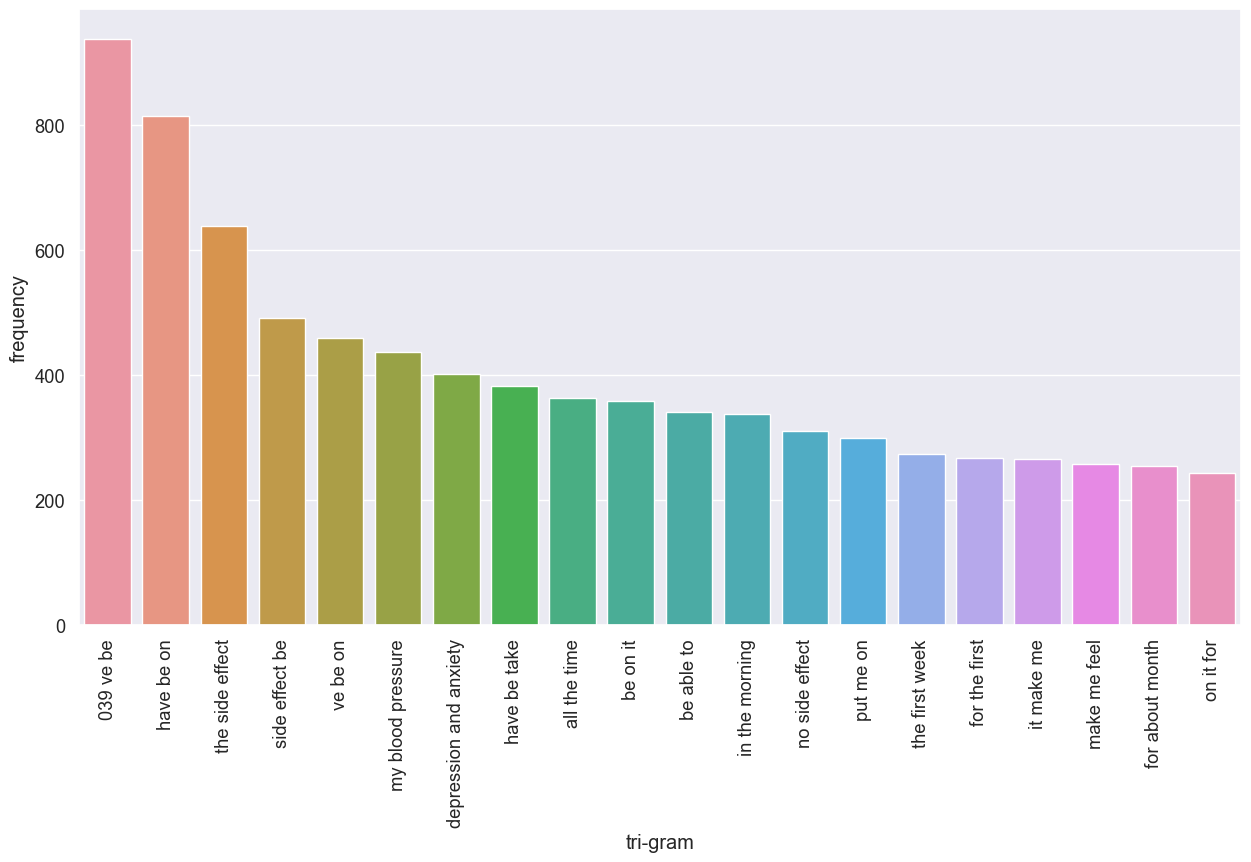

In [148]:
top_20_neg_trigram=get_top_n_words(df_neg['Lemmatized_Review'],n=20,ngram=(3,3))
top_20_neg_trigram=pd.DataFrame(top_20_neg_trigram,columns=['tri-gram','frequency'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='tri-gram',y='frequency',data=top_20_neg_trigram)
fig.set_xticklabels(rotation=90,labels=top_20_neg_trigram['tri-gram'])
plt.show()

# Word Cloud

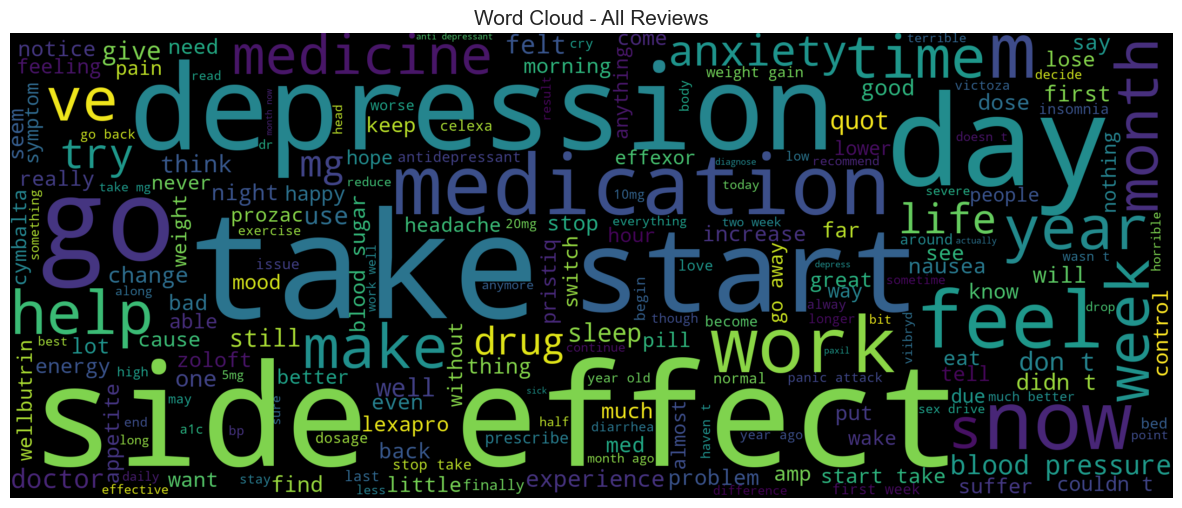

In [149]:
#From complete Reviews
string = " ".join(data['Lemmatized_Review'])
word_cloud = WordCloud(width=2500,height=1000).generate(string)
plt.figure(figsize=(15,15))
plt.imshow(word_cloud,interpolation='bilinear')
plt.title('Word Cloud - All Reviews',size=15)
plt.axis('off')
plt.show()

In [150]:
def positive_negative(txt):
  """
  This function takes text string as input and get only words that are having below pos tags
  ['JJ','JJR','JJS','NNP','NNPS','RB','RBR','RBS','VB','VBD','VBG','VBN','VBP','VBZ']
  """
  list_review=[wrd if tag in ['JJ','JJR','JJS','NNP','NNPS','RB','RBR','RBS','VB','VBD','VBG','VBN','VBP','VBZ'] else '' for wrd, tag in pos_tag(w_tokenizer.tokenize(txt))]
  return (' '.join([x for x in list_review if x]))

In [151]:
data['pos_tags_words'] = data['Lemmatized_Review'].apply(lambda x: positive_negative(x))
data.head()

drugname  condition                                             review  \
0        69          0                      "Gave me terrible headaches."   
1        90          0  "Horrible drug. Didn&#039;t help me with depre...   
2        55          2  "Was put on bystolic for high blood pressure i...   
3       306          1  "Was on .75 for a month as suppose to boost th...   
4       234          0  "Gave me restless, crawly legs on 50mg. It was...   

   rating       date  usefulcount  sentiment_rate  \
0     1.0 2009-11-30            2               1   
1     1.0 2016-02-28           16               1   
2     1.0 2017-10-26            7               1   
3     1.0 2017-09-20            5               1   
4     1.0 2013-02-14           62               1   

                                        review_clean  day  month  ...  \
0                         gave me terrible headaches   30     11  ...   
1  horrible drug didnt help me with depression ma...   28      2  ...   
2  was put on bystolic for high blood pressure in...   26     10  ...   
3  was on  for a month as suppose to boost this u...   20      9  ...   
4  gave me restless crawly legs on mg it was very...   14      2  ...   

   neg_senti_score  neu_senti_score  pos_senti_score compound  \
0            0.508            0.492            0.000  -0.4767   
1            0.423            0.387            0.190  -0.7650   
2            0.175            0.811            0.014  -0.9493   
3            0.075            0.834            0.091   0.2212   
4            0.151            0.849            0.000  -0.7783   

   Sentiment_Vader_Compound  sentiment_spacy_score  sentiment_spacy  no_chars  \
0                  Negative                     -2         Negative        25   
1                  Negative                     -4         Negative        96   
2                  Negative                     -6         Negative       549   
3                  Positive                     -6         Negative       556   
4                  Negative                     -3         Negative       240   

   no_words                                     pos_tags_words  
0         4                                      give terrible  
1        19                      horrible didn make even worse  
2       108  be put high be horrible be only once be intole...  
3       125  be boost up be not bad weight now then start g...  
4        48  give restless crawly legs be very sedate ago b...  

[5 rows x 40 columns]

In [152]:
positive_wordcloud=data[data['sentiment_spacy']=='Positive']['pos_tags_words']
positive_wordcloud

6        do not help lower other just recently have be ...
12       be prescribe old take didn t so depressed i di...
28                                  i haven have slightest
36                     go now i use alone i be much better
37                              i weight very quickly take
                               ...                        
13932                     i feel normal sexual lexapro too
13933    be so glad just recently start i have have few...
13934    have try many antidepressant include celexa ho...
13942        well actually think s good facial keep smooth
13943    have take mostly moderate severe make go i onl...
Name: pos_tags_words, Length: 4434, dtype: object

In [153]:
negative_wordcloud=data[data['sentiment_spacy']=='Negative']['pos_tags_words']
negative_wordcloud

0                                            give terrible
1                            horrible didn make even worse
2        be put high be horrible be only once be intole...
3        be boost up be not bad weight now then start g...
4        give restless crawly legs be very sedate ago b...
                               ...                        
13935    be best cover wide mental take i be then hospi...
13936    say enough much have help spend deep be finall...
13938    be diagnose mild bipolar traumatic generalize ...
13940           get traumatic mental valium presently take
13941    have be i honestly don know i past i have i st...
Name: pos_tags_words, Length: 7617, dtype: object

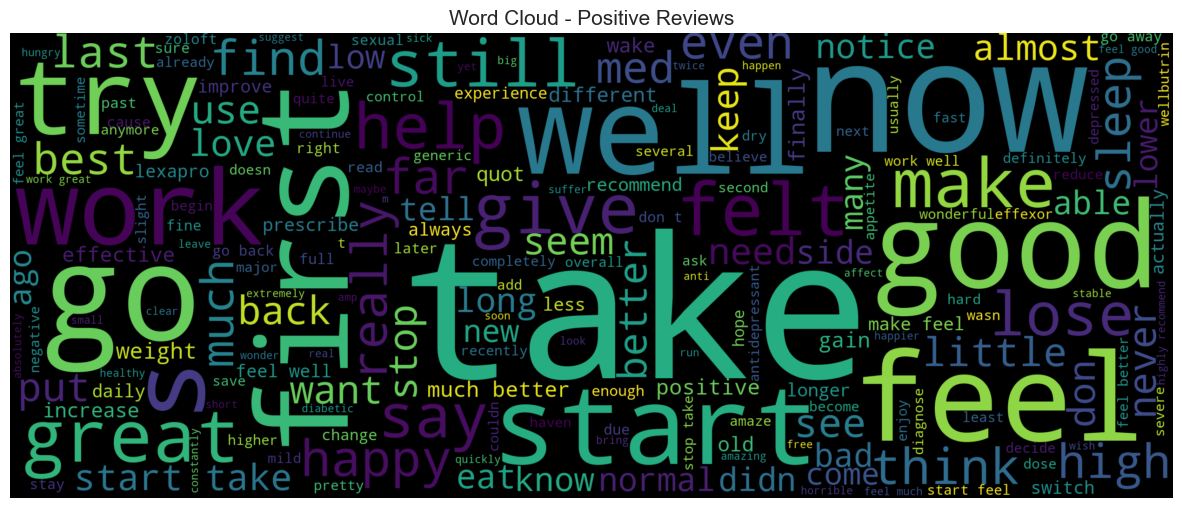

In [154]:
#From Positive Reviews
string = " ".join(positive_wordcloud)
word_cloud = WordCloud(width=2500,height=1000).generate(string)
plt.figure(figsize=(15,15))
plt.imshow(word_cloud,interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews',size=15)
plt.axis('off')
plt.show()

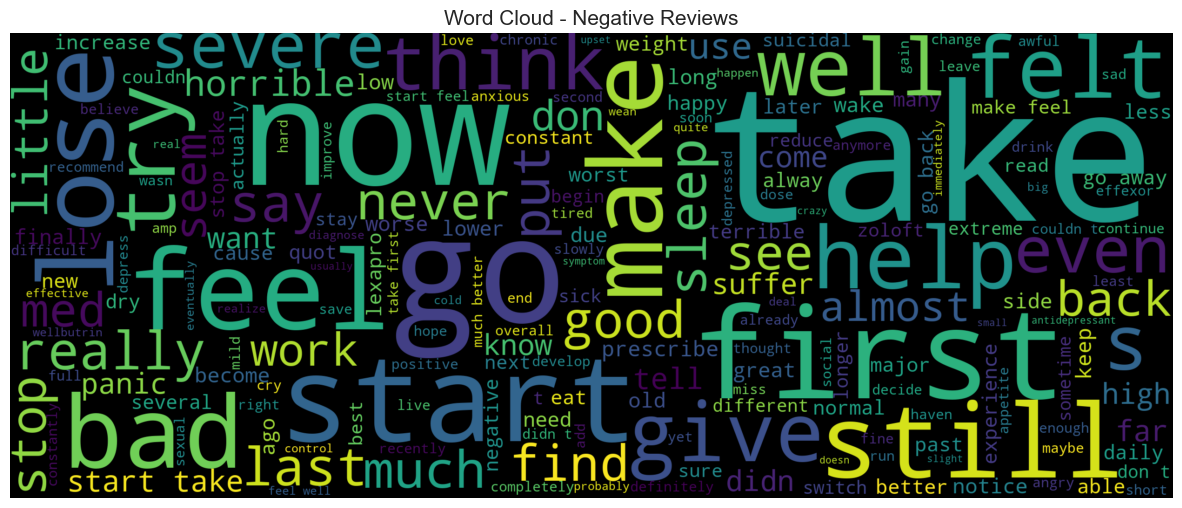

In [155]:
#From Negative Reviews
string = " ".join(negative_wordcloud)
word_cloud = WordCloud(width=2500,height=1000).generate(string)
plt.figure(figsize=(15,15))
plt.imshow(word_cloud,interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews',size=15)
plt.axis('off')
plt.show()

# Model Building

# Data Preparation

In [156]:
x = reviews
y = data["condition"]

In [157]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# Model Building / Model Evaluation / Model Testing

# 1. Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
model_lr = LogisticRegression(multi_class = "ovr")

In [160]:
model_lr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [161]:
# Evaluation
from sklearn.metrics import classification_report

In [162]:
y_pred_lr = model_lr.predict(x_test)

In [163]:
test_lr=pd.DataFrame.from_dict(classification_report(y_test,y_pred_lr,output_dict=True))
print('\033[1m'+'\nLogistic Regression - Testing Data\n')
test_lr.round(2)


Logistic Regression - Testing Data



0       1       2  accuracy  macro avg  weighted avg
precision     0.93    0.98    0.95      0.94       0.95          0.94
recall        0.99    0.89    0.79      0.94       0.89          0.94
f1-score      0.96    0.93    0.86      0.94       0.92          0.94
support    2300.00  625.00  561.00      0.94    3486.00       3486.00


Confusion Matrix - LR - Testing Data


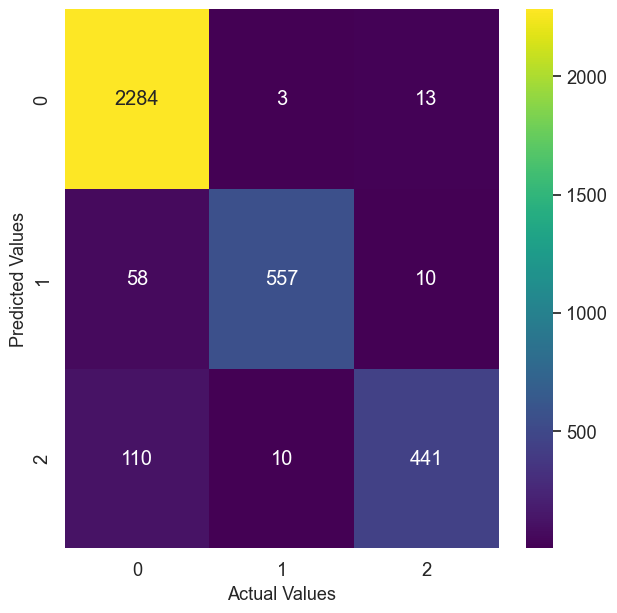

In [164]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

print('\033[1m'+'\nConfusion Matrix - LR - Testing Data')
sns.heatmap(confusion_matrix(y_test,y_pred_lr),
            annot=True,fmt='.0f',cmap="viridis",xticklabels=[0,1,2],yticklabels=[0,1,2])
plt.xlabel('Actual Values',size=13)
plt.ylabel('Predicted Values',size=13)
plt.show()

# Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
model_rf = RandomForestClassifier()

In [167]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [168]:
y_pred_rf = model_rf.predict(x_test)

In [169]:
test_rf=pd.DataFrame.from_dict(classification_report(y_test,y_pred_rf,output_dict=True))
print('\033[1m'+'\nRandom Forest - Testing Data\n')
test_rf.round(2)


Random Forest - Testing Data



0       1       2  accuracy  macro avg  weighted avg
precision     0.94    0.99    0.96      0.95       0.96          0.96
recall        0.99    0.92    0.84      0.95       0.92          0.95
f1-score      0.97    0.95    0.89      0.95       0.94          0.95
support    2300.00  625.00  561.00      0.95    3486.00       3486.00


Confusion Matrix - RF - Testing Data


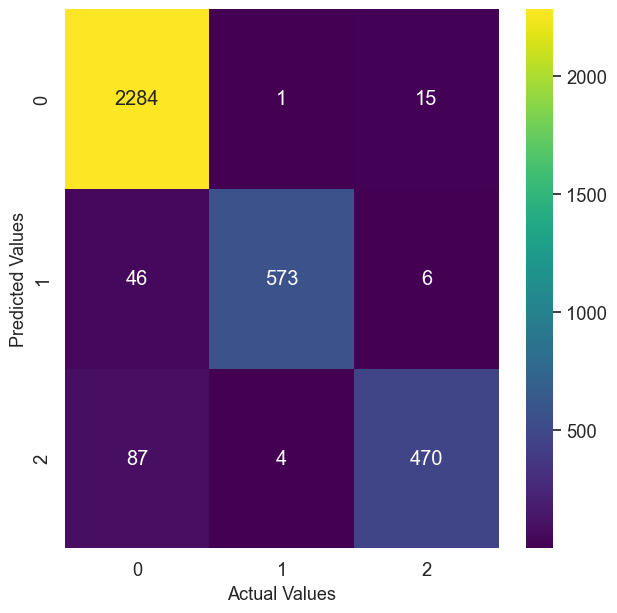

In [170]:
print('\033[1m'+'\nConfusion Matrix - RF - Testing Data')
sns.heatmap(confusion_matrix(y_test,y_pred_rf),
            annot=True,fmt='.0f',cmap="viridis",xticklabels=[0,1,2],yticklabels=[0,1,2])
plt.xlabel('Actual Values',size=13)
plt.ylabel('Predicted Values',size=13)
plt.show()

# Decision Tree

In [171]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [173]:
y_pred_dt = model_dt.predict(x_test)

In [174]:
test_dt=pd.DataFrame.from_dict(classification_report(y_test,y_pred_dt,output_dict=True))
print('\033[1m'+'\nDecision Tree - Testing Data\n')
test_dt.round(2)


Decision Tree - Testing Data



0       1       2  accuracy  macro avg  weighted avg
precision     0.95    0.92    0.87      0.93       0.91          0.93
recall        0.96    0.92    0.84      0.93       0.91          0.93
f1-score      0.96    0.92    0.85      0.93       0.91          0.93
support    2300.00  625.00  561.00      0.93    3486.00       3486.00


Confusion Matrix - DT - Testing Data


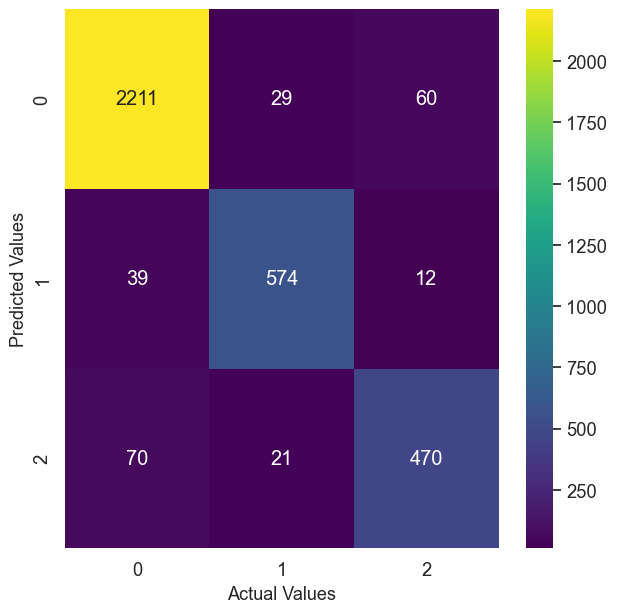

In [175]:
print('\033[1m'+'\nConfusion Matrix - DT - Testing Data')
sns.heatmap(confusion_matrix(y_test,y_pred_dt),
            annot=True,fmt='.0f',cmap="viridis",xticklabels=[0,1,2],yticklabels=[0,1,2])
plt.xlabel('Actual Values',size=13)
plt.ylabel('Predicted Values',size=13)
plt.show()

# Support Vector Machine

In [176]:
from sklearn.svm import SVC

In [177]:
model_svm = SVC()
model_svm.fit(x_train,y_train)

SVC()

In [178]:
y_pred_svm = model_svm.predict(x_test)

In [179]:
test_svm=pd.DataFrame.from_dict(classification_report(y_test,y_pred_svm,output_dict=True))
print('\033[1m'+'\nSupport Vector Machine - Testing Data\n')
test_svm.round(2)


Support Vector Machine - Testing Data



0       1       2  accuracy  macro avg  weighted avg
precision     0.95    0.99    0.97      0.96       0.97          0.96
recall        0.99    0.92    0.86      0.96       0.92          0.96
f1-score      0.97    0.95    0.91      0.96       0.95          0.96
support    2300.00  625.00  561.00      0.96    3486.00       3486.00


Confusion Matrix - SVM - Testing Data


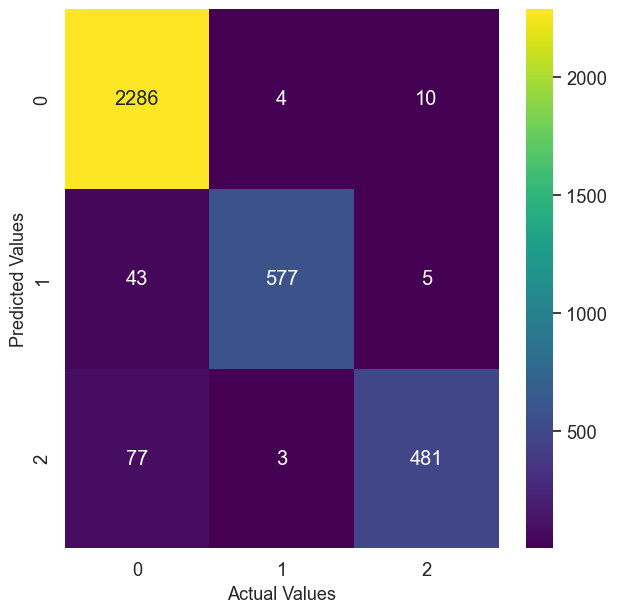

In [180]:
print('\033[1m'+'\nConfusion Matrix - SVM - Testing Data')
sns.heatmap(confusion_matrix(y_test,y_pred_svm),
            annot=True,fmt='.0f',cmap="viridis",xticklabels=[0,1,2],yticklabels=[0,1,2])
plt.xlabel('Actual Values',size=13)
plt.ylabel('Predicted Values',size=13)
plt.show()

# Lightgbm

In [181]:
from lightgbm import LGBMClassifier

In [182]:
#Light GBM

lgbm = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model_lgbm = lgbm.fit(x_train, y_train)


In [183]:
y_pred_lgbm = model_lgbm.predict(x_test)

In [184]:
test_lgbm=pd.DataFrame.from_dict(classification_report(y_test,y_pred_lgbm,output_dict=True))
print('\033[1m'+'\nLightGBM - Testing Data\n')
test_lgbm.round(2)


LightGBM - Testing Data



0       1       2  accuracy  macro avg  weighted avg
precision     0.96    0.97    0.93      0.96       0.95          0.96
recall        0.98    0.93    0.88      0.96       0.93          0.96
f1-score      0.97    0.95    0.90      0.96       0.94          0.96
support    2300.00  625.00  561.00      0.96    3486.00       3486.00


Confusion Matrix - LGBM - Testing Data


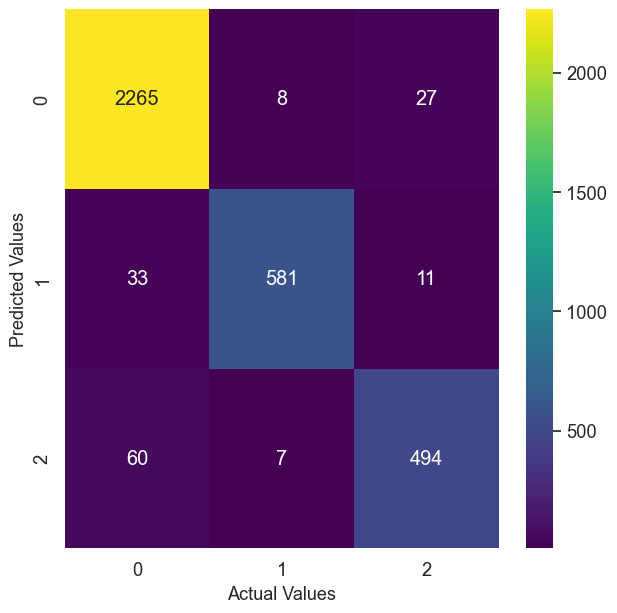

In [185]:
print('\033[1m'+'\nConfusion Matrix - LGBM - Testing Data')
sns.heatmap(confusion_matrix(y_test,y_pred_lgbm),
            annot=True,fmt='.0f',cmap="viridis",xticklabels=[0,1,2],yticklabels=[0,1,2])
plt.xlabel('Actual Values',size=13)
plt.ylabel('Predicted Values',size=13)
plt.show()

# XGBoost

In [186]:
from xgboost import XGBClassifier

In [187]:
model_xgb=XGBClassifier(n_estimators=100)

In [188]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [189]:
y_pred_xgb = model_xgb.predict(x_test)

In [190]:
test_xgb=pd.DataFrame.from_dict(classification_report(y_test,y_pred_xgb,output_dict=True))
print('\033[1m'+'\nXG Boosting - Testing Data\n')
test_xgb.round(2)


XG Boosting - Testing Data



0       1       2  accuracy  macro avg  weighted avg
precision     0.95    0.98    0.94      0.95       0.96          0.95
recall        0.99    0.92    0.85      0.95       0.92          0.95
f1-score      0.97    0.95    0.89      0.95       0.94          0.95
support    2300.00  625.00  561.00      0.95    3486.00       3486.00


Confusion Matrix - XGB - Testing Data


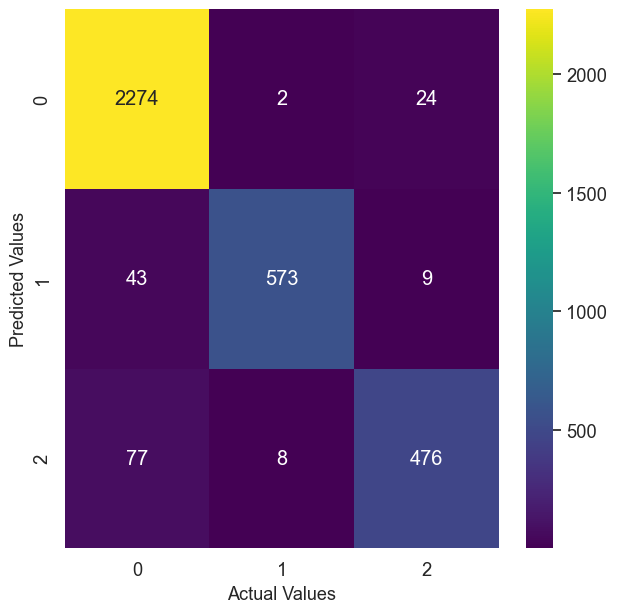

In [191]:
print('\033[1m'+'\nConfusion Matrix - XGB - Testing Data')
sns.heatmap(confusion_matrix(y_test,y_pred_xgb),
            annot=True,fmt='.0f',cmap="viridis",xticklabels=[0,1,2],yticklabels=[0,1,2])
plt.xlabel('Actual Values',size=13)
plt.ylabel('Predicted Values',size=13)
plt.show()

# Best Model - SVM

In [192]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [193]:
x_train_pred = model_svm.predict(x_train)

In [194]:
print("Accracy Score on training dataset is " , round(accuracy_score(y_train,x_train_pred),3))
print("Accracy Score on testing dataset is ", round(accuracy_score(y_test,y_pred_svm),3))

Accracy Score on training dataset is  0.996
Accracy Score on testing dataset is  0.959


In [195]:
test_final=pd.DataFrame.from_dict(classification_report(y_test,y_pred_svm,output_dict=True))
print('\033[1m'+'\nFinal - Testing Data\n')
test_final.round(2)


Final - Testing Data



0       1       2  accuracy  macro avg  weighted avg
precision     0.95    0.99    0.97      0.96       0.97          0.96
recall        0.99    0.92    0.86      0.96       0.92          0.96
f1-score      0.97    0.95    0.91      0.96       0.95          0.96
support    2300.00  625.00  561.00      0.96    3486.00       3486.00

In [196]:
data.to_csv("Processed_drugcom.csv")
print("Done!!!!!")

Done!!!!!
